# Weather - Time Series Forecasting

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,mean_absolute_percentage_error,max_error,median_absolute_error
import math 
from statistics import mean
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(3653, 5)

In [4]:
df.head()

,date,Temperature,Dew,Humidity,Pressure
0,01-01-2012,25.30,23.26,17.82,100.63
1,02-01-2012,25.49,22.97,17.52,100.64
2,03-01-2012,25.76,22.97,17.52,100.63
3,04-01-2012,25.57,23.01,17.58,100.67
4,05-01-2012,25.17,22.40,16.85,100.83


# Basic information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3653 non-null   object 
 1   Temperature  3653 non-null   float64
 2   Dew          3653 non-null   float64
 3   Humidity     3653 non-null   float64
 4   Pressure     3653 non-null   float64
dtypes: float64(4), object(1)
memory usage: 142.8+ KB


In [6]:
df.describe()

,Temperature,Dew,Humidity,Pressure
count,3653.000000,3653.000000,3653.000000,3653.000000
mean,27.980378,22.028349,16.784862,100.328026
std,2.555750,2.067173,2.045052,0.366094
min,21.400000,14.160000,10.250000,99.360000
25%,25.870000,20.750000,15.380000,100.020000
50%,28.130000,22.510000,17.210000,100.310000
75%,29.980000,23.640000,18.370000,100.640000
max,35.260000,26.180000,21.420000,101.230000


# Duplicate values

In [7]:
df.duplicated().sum()

0

# Find the Null values

In [8]:
df.isnull().sum()

date           0
Temperature    0
Dew            0
Humidity       0
Pressure       0
dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['date'])

# Boxplot

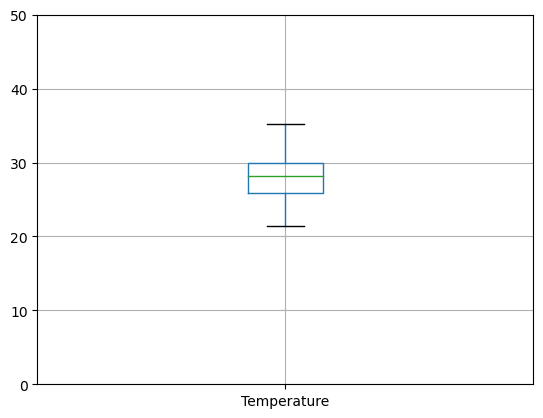

In [10]:
df.boxplot(column='Temperature')
plt.ylim(0,50)
plt.show()

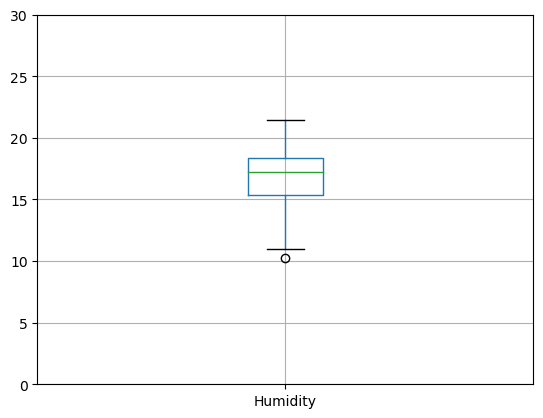

In [11]:
df.boxplot(column='Humidity')
plt.ylim(0,30)
plt.show()

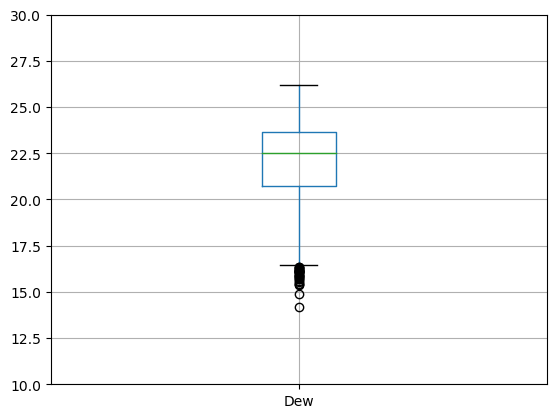

In [12]:
df.boxplot(column='Dew')
plt.ylim(10,30)
plt.show()

In [13]:
df.Dew.min()

14.16

In [14]:
df=df[df['Dew']>=16.5]

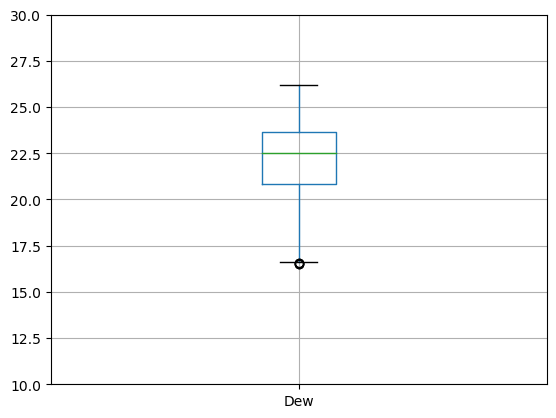

In [15]:
df.boxplot(column='Dew')
plt.ylim(10,30)
plt.show()

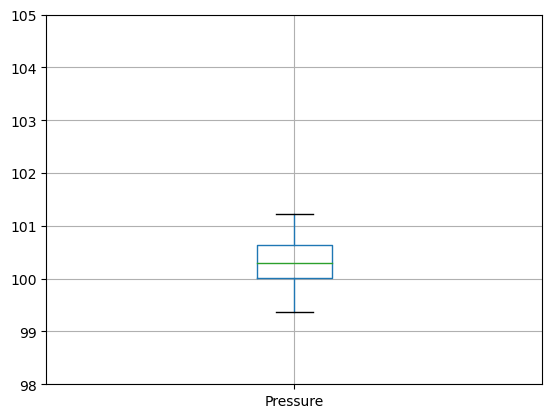

In [16]:
df.boxplot(column='Pressure')
plt.ylim(98,105)
plt.show()

# Correlation Plot

In [17]:
df.corr()

,Temperature,Dew,Humidity,Pressure
Temperature,1.000000,0.463715,0.497182,-0.729277
Dew,0.463715,1.000000,0.996597,-0.570351
Humidity,0.497182,0.996597,1.000000,-0.600535
Pressure,-0.729277,-0.570351,-0.600535,1.000000


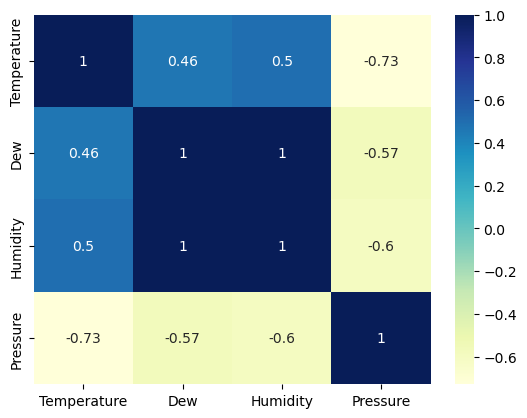

In [18]:
import seaborn  
correlation = df. corr ()  
sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show()

# Monthly data visualisation

In [19]:
df['date_month'] = df['date'].dt.month

In [20]:
month_grp=df.groupby(['date_month']).mean()

In [21]:
month_grp

,Temperature,Dew,Humidity,Pressure
date_month,,,,
1,25.680492,20.353902,15.080131,100.628557
2,26.886570,20.700542,15.467184,100.552347
3,28.657459,21.080228,15.903322,100.459511
4,29.823980,22.545351,17.346455,100.295251
5,30.185812,23.019286,17.861169,100.079578
6,29.577374,22.236801,17.006532,100.069024
7,28.936091,22.743648,17.490293,100.084821
8,28.433571,23.042662,17.791851,100.130649
9,28.018960,23.129966,17.880336,100.198154


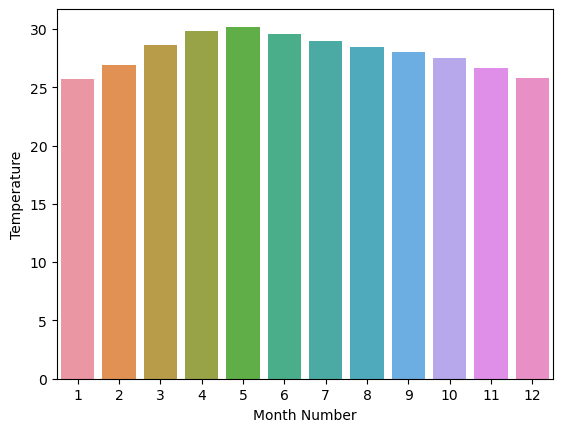

In [22]:
sns.barplot(x=month_grp.index, y='Temperature', data=month_grp)
plt.xlabel('Month Number')
plt.ylabel('Temperature')
plt.show()

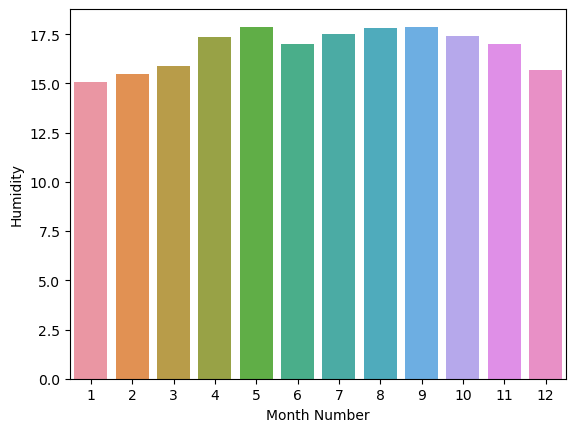

In [23]:
sns.barplot(x=month_grp.index, y='Humidity', data=month_grp)
plt.xlabel('Month Number')
plt.ylabel('Humidity')
plt.show()

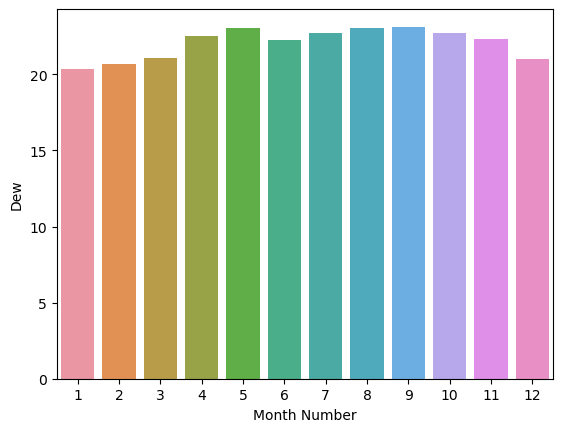

In [24]:
sns.barplot(x=month_grp.index, y='Dew', data=month_grp)
plt.xlabel('Month Number')
plt.ylabel('Dew')
plt.show()

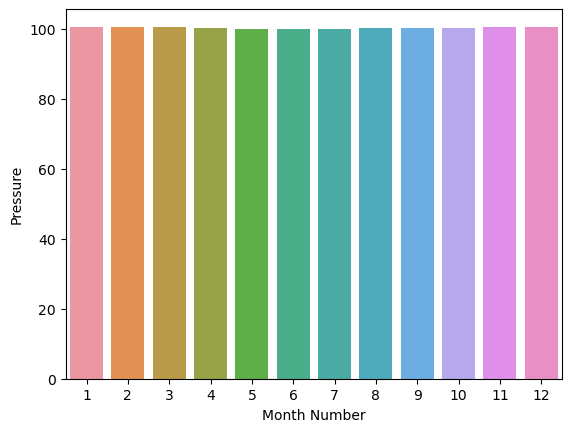

In [25]:
sns.barplot(x=month_grp.index, y='Pressure', data=month_grp)
plt.xlabel('Month Number')
plt.ylabel('Pressure')
plt.show()

# Check for whitenoise

In [26]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

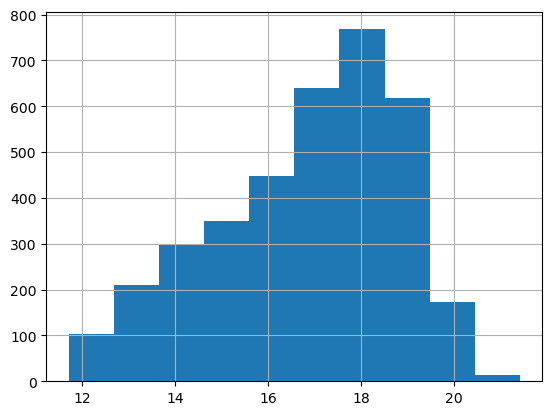

In [27]:
df['Humidity'].hist()
pyplot.show()

we can notice that data is left skewed

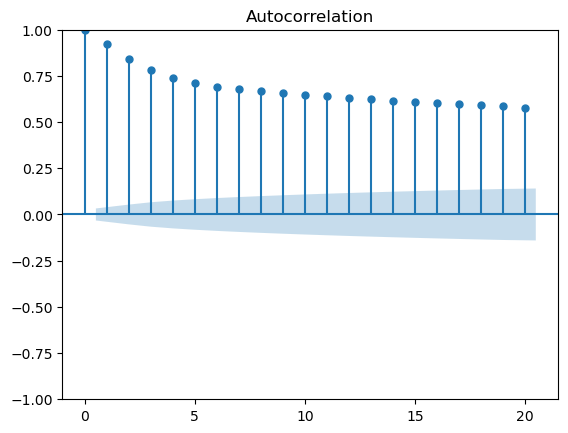

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
# ACF function up to 20 lags
fig = plot_acf(df['Humidity'], lags=20)
plt.show();

# The Ljung-Box test for white noise detection

In [29]:
import statsmodels.stats.diagnostic as diag

diag.acorr_ljungbox(df['Humidity'], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)

(array([50767.25416545]), array([0.]), array([50513.68159071]), array([0.]))

check the p-value since less than 0.01 we can conclude no white noise

# Seasonality , trends

In [30]:
df.sort_index(inplace=True)

In [31]:
df.index=pd.to_datetime(df.index)

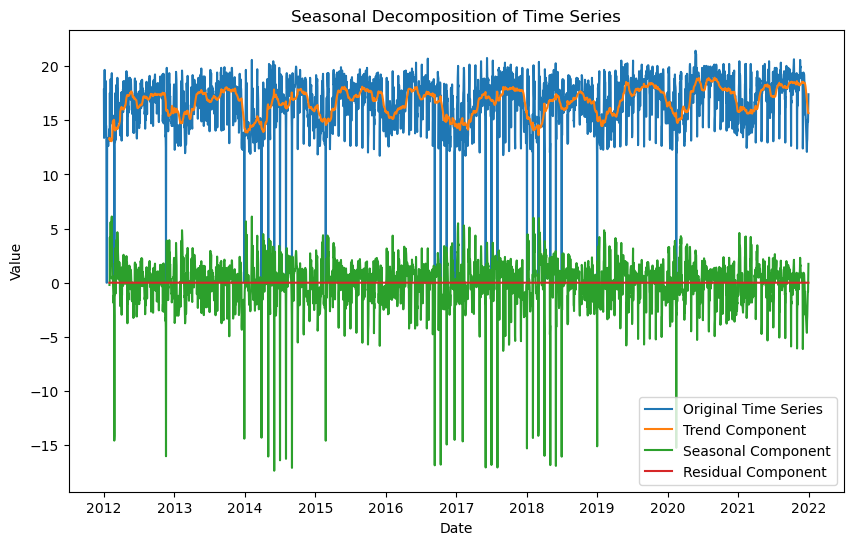

In [854]:
analysis = df['Humidity'].resample('D').sum()

# Calculate trend, seasonal, and residual components
trend = analysis.rolling(window=30).mean()
seasonal = analysis - trend
residual = analysis - trend - seasonal

# Create a single plot for all components
plt.figure(figsize=(10, 6))

# Plot the time series
plt.plot(analysis, label='Original Time Series')

# Plot the trend component
plt.plot(trend, label='Trend Component')

# Plot the seasonal component
plt.plot(seasonal, label='Seasonal Component')

# Plot the residual component
plt.plot(residual, label='Residual Component')

# Set the plot title and labels
plt.title('Seasonal Decomposition of Time Series')
plt.xlabel('Date')
plt.ylabel('Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Stationary Check

In [33]:
df

,date,Temperature,Dew,Humidity,Pressure,date_month
1970-01-01 00:00:00.000000000,2012-01-01,25.30,23.26,17.82,100.63,1
1970-01-01 00:00:00.000000001,2012-02-01,25.49,22.97,17.52,100.64,2
1970-01-01 00:00:00.000000002,2012-03-01,25.76,22.97,17.52,100.63,3
1970-01-01 00:00:00.000000003,2012-04-01,25.57,23.01,17.58,100.67,4
1970-01-01 00:00:00.000000004,2012-05-01,25.17,22.40,16.85,100.83,5
...,...,...,...,...,...,...
1970-01-01 00:00:00.000003648,2021-12-27,24.25,20.08,14.59,100.97,12
1970-01-01 00:00:00.000003649,2021-12-28,24.00,20.61,15.08,100.90,12
1970-01-01 00:00:00.000003650,2021-12-29,24.37,20.38,14.89,100.82,12
1970-01-01 00:00:00.000003651,2021-12-30,24.55,22.05,16.60,100.90,12


In [34]:
df.set_index('date', inplace=True)
data = pd.DataFrame(df.resample('W').mean())
data

,Temperature,Dew,Humidity,Pressure,date_month
date,,,,,
2012-01-01,25.300000,23.260000,17.820000,100.630000,1.000000
2012-01-08,29.162857,21.604286,16.382857,100.131429,1.000000
2012-01-15,25.326667,21.296667,15.993333,100.418333,1.000000
2012-01-22,22.666000,18.190000,13.040000,100.582000,1.000000
2012-01-29,23.372857,18.538571,13.294286,100.714286,1.000000
...,...,...,...,...,...
2021-12-05,26.911429,22.117143,16.864286,100.561429,11.714286
2021-12-12,27.512857,23.252857,17.988571,100.042857,12.000000
2021-12-19,24.647143,21.242857,15.765714,100.781429,12.000000


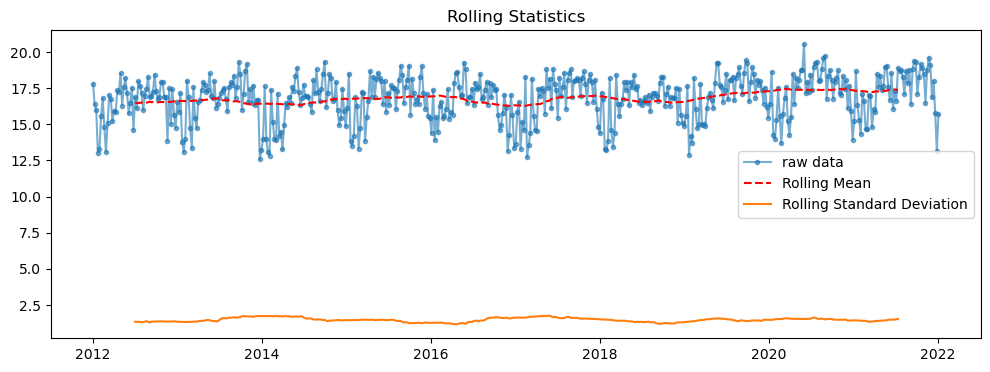

In [35]:
def test_stationarity(timeseries, title):
    roll_mean = timeseries['Humidity'].rolling(window = 52,  center=True).mean()
    roll_std = timeseries['Humidity'].rolling(window = 52,  center=True).std()
    plt.figure(figsize=(12, 4), dpi=100)
    plt.plot(timeseries.Humidity, label= title, marker=".", alpha=0.6)
    plt.plot(roll_mean, label="Rolling Mean", color="red", linestyle="--")
    plt.plot(roll_std, label="Rolling Standard Deviation")
    plt.title("Rolling Statistics")
    plt.legend()
    plt.show()
test_stationarity(data, 'raw data')

# HOLT WINTER'S MODEL

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

Training Period = 30 days

In [37]:
data = pd.DataFrame(df.resample('D').mean())

In [38]:
train_size = int(len(data.iloc[-33:].iloc[:33]))
train_data_30, test_data = data[:train_size], data[train_size:]
train_data_30.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_30 = train_data_30.dropna()
test_data = test_data.dropna()
train_data_30

,Humidity
date,
2012-01-01,17.82
2012-01-02,13.37
2012-01-03,17.70
2012-01-04,15.99
2012-01-05,19.65
2012-01-06,14.89
2012-01-07,17.27
2012-01-08,15.81
2012-01-09,17.70


In [39]:
test_data

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
...,...
2021-12-27,14.59
2021-12-28,15.08
2021-12-29,14.89


In [40]:
model = ExponentialSmoothing(train_data_30, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

7 days

In [41]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01


In [42]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.09, 14.02, 14.97, 15.49, 15.73, 13.81, 14.36])

In [43]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.281


In [44]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

12.747093783485658


In [45]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.8835417958354577

In [46]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.020972472335377

In [47]:
mse = mean_squared_error(test_data_30, forecasting)
mse

5.202773993115332

In [48]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.830


In [49]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.135


15 days

In [50]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01
2012-02-10,18.86
2012-02-11,19.35


In [51]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.09, 14.02, 14.97, 15.49, 15.73, 13.81, 14.36, 12.06, 13.38,
       13.12, 15.54, 12.73, 14.1 , 13.03, 13.97])

In [52]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.984


In [53]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

16.44919182396869


In [54]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.286305666592772

In [55]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

13.580557452799166

In [56]:
mse = mean_squared_error(test_data_30, forecasting)
mse

8.906543644889256

In [57]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 6.804


In [58]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.714


30 days

In [59]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01
2012-02-10,18.86
2012-02-11,19.35


In [60]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.09, 14.02, 14.97, 15.49, 15.73, 13.81, 14.36, 12.06, 13.38,
       13.12, 15.54, 12.73, 14.1 , 13.03, 13.97, 14.49, 14.74, 12.82,
       13.36, 11.06, 12.38, 12.12, 14.54, 11.73, 13.1 , 12.03, 12.98,
       13.5 , 13.74, 11.82])

In [61]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.864


In [62]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

16.315678879276426


In [63]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.1092586457864835

In [64]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

14.528510899164443

In [65]:
mse = mean_squared_error(test_data_30, forecasting)
mse

8.203632179307169

In [66]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 6.804


In [67]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.305


Training Period = 90 days

In [68]:
train_size = int(len(data.iloc[-90:].iloc[:90]))
train_data_90, test_data = df[:train_size], df[train_size:]
train_data_90.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_90 = train_data_90.dropna()
test_data = test_data.dropna()
train_data_90

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-03-31,16.97
2012-01-04,15.99
2012-02-04,15.14


In [69]:
model = ExponentialSmoothing(train_data_90, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

7 days

In [70]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21


In [71]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.18, 15.49, 15.4 , 15.44, 15.6 , 15.38, 15.34])

In [72]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.670


In [73]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

9.644694168752212


In [74]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.5376962342098426

In [75]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

9.01537097495823

In [76]:
mse = mean_squared_error(test_data_30, forecasting)
mse

2.790304313191924

In [77]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.177


In [78]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.866


15 days

In [79]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21
2012-12-04,17.15
2012-04-13,17.03


In [80]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.18, 15.49, 15.4 , 15.44, 15.6 , 15.38, 15.34, 15.02, 14.77,
       15.05, 14.86, 14.58, 14.87, 15.18, 15.09])

In [81]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.996


In [82]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

11.569589098063055


In [83]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.9036698901968654

In [84]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.08377021461447

In [85]:
mse = mean_squared_error(test_data_30, forecasting)
mse

3.9840648762767743

In [86]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.698


In [87]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.134


30 days

In [88]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21
2012-12-04,17.15
2012-04-13,17.03


In [89]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.18, 15.49, 15.4 , 15.44, 15.6 , 15.38, 15.34, 15.02, 14.77,
       15.05, 14.86, 14.58, 14.87, 15.18, 15.09, 15.13, 15.29, 15.07,
       15.03, 14.71, 14.46, 14.74, 14.55, 14.27, 14.56, 14.87, 14.78,
       14.82, 14.98, 14.76])

In [90]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.920


In [91]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

15.936569011893873


In [92]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.6750270611098292

In [93]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

14.898048396756803

In [94]:
mse = mean_squared_error(test_data_30, forecasting)
mse

8.528999588081762

In [95]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 4.980


In [96]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.319


Training Period = 180 days

In [97]:
train_size = int(len(data.iloc[-180:].iloc[:180]))
train_data_180, test_data = df[:train_size], df[train_size:]
train_data_180.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_180 = train_data_180.dropna()
test_data = test_data.dropna()
train_data_180

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-06-29,16.78
2012-06-30,17.64
2012-01-07,17.27


In [98]:
model = ExponentialSmoothing(train_data_180, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

7 days

In [99]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13


In [100]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.72, 16.4 , 16.6 , 16.9 , 16.94, 16.65, 16.95])

In [101]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.867


In [102]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

4.946737010510392


In [103]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.7668621106858955

In [104]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

4.9919404849585955

In [105]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.7514954298377855

In [106]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.360


In [107]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.802


15 days

In [108]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13
2012-11-07,17.46
2012-12-07,18.31


In [109]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.72, 16.4 , 16.6 , 16.9 , 16.94, 16.65, 16.95, 17.15, 16.88,
       16.91, 16.69, 16.53, 16.65, 16.32, 16.53])

In [110]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.272


In [111]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

6.991042640861024


In [112]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.1167396082388146

In [113]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

6.47021737157913

In [114]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.618246140095217

In [115]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.416


In [116]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.183


30 days

In [117]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13
2012-11-07,17.46
2012-12-07,18.31


In [118]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.72, 16.4 , 16.6 , 16.9 , 16.94, 16.65, 16.95, 17.15, 16.88,
       16.91, 16.69, 16.53, 16.65, 16.32, 16.53, 16.82, 16.86, 16.58,
       16.87, 17.07, 16.81, 16.84, 16.62, 16.45, 16.58, 16.25, 16.45,
       16.75, 16.79, 16.5 ])

In [119]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.076


In [120]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

6.128097004386671


In [121]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.9301792859219739

In [122]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

5.739760441045978

In [123]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.1587721551696315

In [124]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.416


In [125]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.860


Training Period = 360 days

In [126]:
train_size = int(len(data.iloc[-360:].iloc[:360]))
train_data_360, test_data = df[:train_size], df[train_size:]
train_data_360.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_360 = train_data_360.dropna()
test_data = test_data.dropna()
train_data_360

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-12-27,16.05
2012-12-28,17.15
2012-12-29,18.01


In [127]:
model = ExponentialSmoothing(train_data_360, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

7 days 

In [128]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32


In [129]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.27, 17.03, 17.05, 17.21, 17.31, 17.24, 17.55])

In [130]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.367


In [131]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

8.893663996477391


In [132]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.1317535876286546

In [133]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

7.276780580275208

In [134]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.868131575484964

In [135]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.226


In [136]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.819


15 days 

In [137]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32
2013-08-01,15.08
2013-09-01,15.01


In [138]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.27, 17.03, 17.05, 17.21, 17.31, 17.24, 17.55, 17.68, 17.61,
       17.57, 17.42, 17.38, 17.25, 17.01, 17.03])

In [139]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.580


In [140]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

18.472633431155884


In [141]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.2563667719468024

In [142]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

15.796484667536415

In [143]:
mse = mean_squared_error(test_data_30, forecasting)
mse

6.657609304536889

In [144]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 4.314


In [145]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.600


30 days

In [146]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32
2013-08-01,15.08
2013-09-01,15.01


In [147]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.27, 17.03, 17.05, 17.21, 17.31, 17.24, 17.55, 17.68, 17.61,
       17.57, 17.42, 17.38, 17.25, 17.01, 17.03, 17.19, 17.29, 17.22,
       17.53, 17.66, 17.6 , 17.55, 17.4 , 17.36, 17.24, 16.99, 17.01,
       17.17, 17.27, 17.2 ])

In [148]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 3.249


In [149]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

24.069263907318604


In [150]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.9934752504026503

In [151]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

21.78027895035918

In [152]:
mse = mean_squared_error(test_data_30, forecasting)
mse

10.558242689907333

In [153]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 4.965


In [154]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 3.092


Training Period = 540 days

In [155]:
train_size = int(len(data.iloc[-540:].iloc[:540]))
train_data_540, test_data = df[:train_size], df[train_size:]
train_data_540.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_540 = train_data_540.dropna()
test_data = test_data.dropna()
train_data_540

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2013-06-25,15.81
2013-06-26,17.40
2013-06-27,17.94


In [156]:
model = ExponentialSmoothing(train_data_540, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

7 days

In [157]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07


In [158]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.05, 16.93, 16.95, 17.06, 17.19, 17.16, 17.24])

In [159]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.744


In [160]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

4.562894641066116


In [161]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.6530008065908434

In [162]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

4.414383499141274

In [163]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.5534527099387531

In [164]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.256


In [165]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.816


15 days 

In [166]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07
2013-07-07,17.46
2013-08-07,17.15


In [167]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.05, 16.93, 16.95, 17.06, 17.19, 17.16, 17.24, 17.35, 17.16,
       17.18, 17.22, 17.19, 17.03, 16.91, 16.93])

In [168]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.578


In [169]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

3.533589688473382


In [170]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.4453698080778005

In [171]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

2.9737792181277993

In [172]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.3337234603789199

In [173]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.256


In [174]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.341


30 days

In [175]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07
2013-07-07,17.46
2013-08-07,17.15


In [176]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.05, 16.93, 16.95, 17.06, 17.19, 17.16, 17.24, 17.35, 17.16,
       17.18, 17.22, 17.19, 17.03, 16.91, 16.93, 17.05, 17.17, 17.15,
       17.22, 17.33, 17.14, 17.17, 17.2 , 17.18, 17.02, 16.89, 16.91,
       17.03, 17.16, 17.13])

In [177]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.649


In [178]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

3.967971410558007


In [179]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.5140652264486926

In [180]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

3.383893355985997

In [181]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.4211472785625941

In [182]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.510


In [183]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.382


# ARIMA MODEL

In [184]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Training Period = 30 days

In [185]:
train_size = int(len(data.iloc[-33:].iloc[:33]))
train_data_30, test_data = data[:train_size], data[train_size:]
train_data_30.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_30 = train_data_30.dropna()
test_data = test_data.dropna()
train_data_30

,Humidity
date,
2012-01-01,17.82
2012-01-02,13.37
2012-01-03,17.70
2012-01-04,15.99
2012-01-05,19.65
2012-01-06,14.89
2012-01-07,17.27
2012-01-08,15.81
2012-01-09,17.70


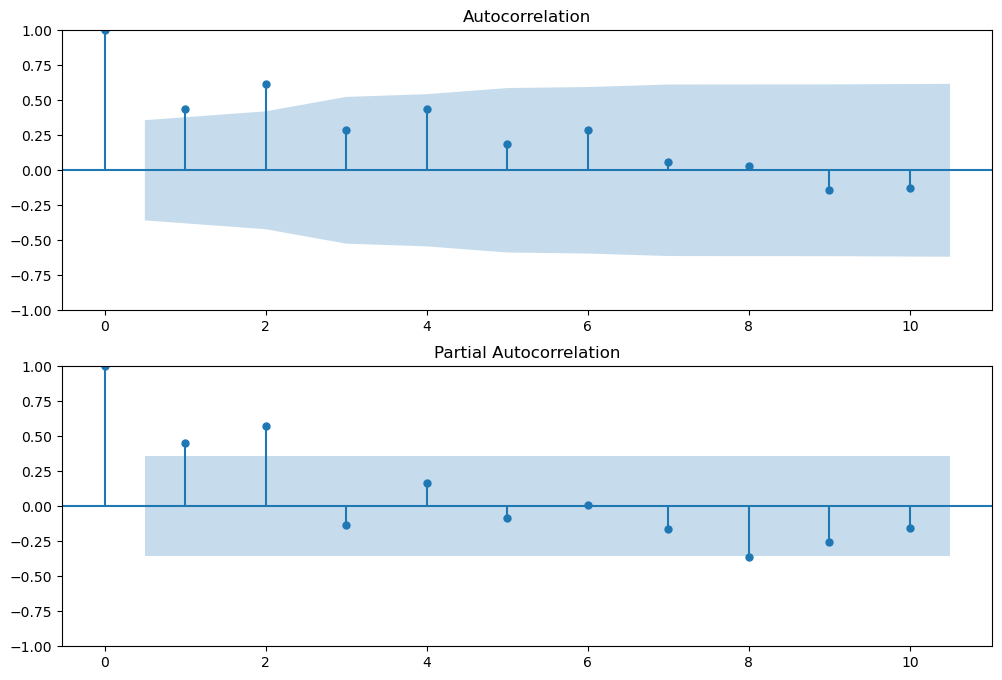

In [186]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_data_30, lags=10, ax=ax[0])
plot_pacf(train_data_30, lags=10, ax=ax[1])
plt.show()

In [187]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_30['Humidity'], order=(4,1,4))
model_fit = model.fit()

7 days

In [188]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01


In [189]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.28, 12.73, 15.1 , 13.12, 16.07, 14.32, 15.96])

In [190]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.055


In [191]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

12.029138501287571


In [192]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.7700305123912792

In [193]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

12.56644684998741

In [194]:
mse = mean_squared_error(test_data_30, forecasting)
mse

4.2223837036215475

In [195]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.698


In [196]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.023


15 days 

In [197]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01
2012-02-10,18.86
2012-02-11,19.35


In [198]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.28, 12.73, 15.1 , 13.12, 16.07, 14.32, 15.96, 13.39, 14.72,
       13.26, 15.57, 14.52, 15.92, 13.8 , 14.65])

In [199]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.425


In [200]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

13.539084800748402


In [201]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.8797747374345424

In [202]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.839043067236329

In [203]:
mse = mean_squared_error(test_data_30, forecasting)
mse

5.880198509031886

In [204]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 5.473


In [205]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.573


30 days

In [206]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01
2012-02-10,18.86
2012-02-11,19.35


In [207]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.28, 12.73, 15.1 , 13.12, 16.07, 14.32, 15.96, 13.39, 14.72,
       13.26, 15.57, 14.52, 15.92, 13.8 , 14.65, 13.25, 15.22, 14.51,
       15.93, 14.11, 14.72, 13.24, 14.94, 14.39, 15.93, 14.36, 14.87,
       13.28, 14.71, 14.21])

In [208]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.291


In [209]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

13.768581776200978


In [210]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.8368839460664865

In [211]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.819964182714973

In [212]:
mse = mean_squared_error(test_data_30, forecasting)
mse

5.247643726131432

In [213]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 5.473


In [214]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.482


Training Period = 90 days

In [215]:
train_size = int(len(data.iloc[-90:].iloc[:90]))
train_data_90, test_data = df[:train_size], df[train_size:]
train_data_90.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_90 = train_data_90.dropna()
test_data = test_data.dropna()
train_data_90

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-03-31,16.97
2012-01-04,15.99
2012-02-04,15.14


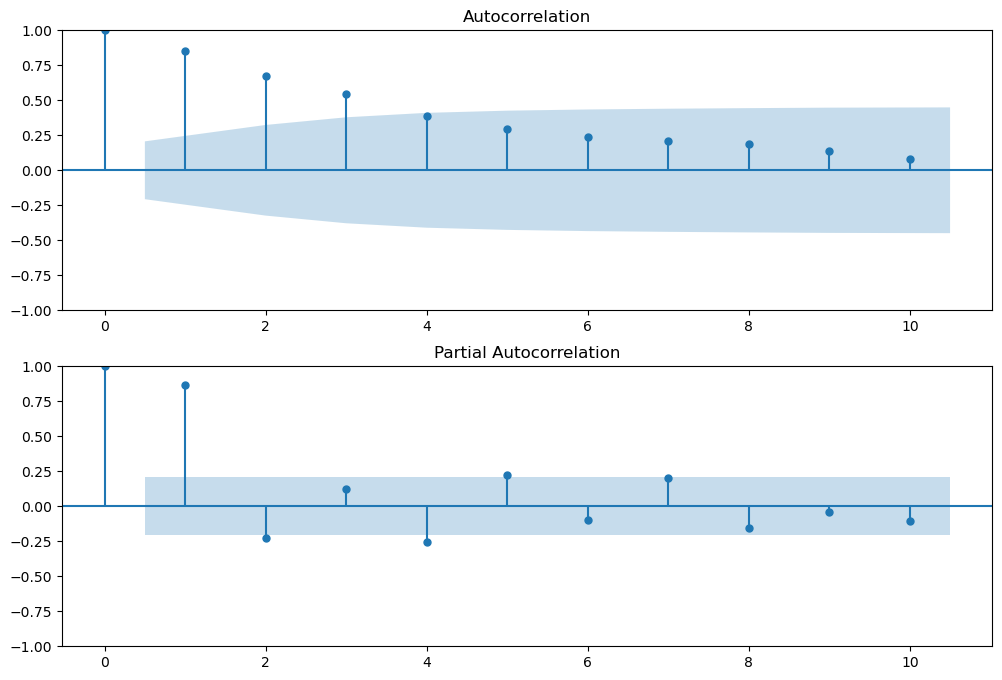

In [216]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_data_90, lags=10, ax=ax[0])
plot_pacf(train_data_90, lags=10, ax=ax[1])
plt.show()

In [217]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_90['Humidity'], order=(5,1,6))
model_fit = model.fit()

7 days

In [218]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21


In [219]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([14.28, 14.67, 14.7 , 14.69, 14.82, 14.79, 14.9 ])

In [220]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.319


In [221]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

13.47662890977063


In [222]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.2485646522242577

In [223]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

13.111106012127994

In [224]:
mse = mean_squared_error(test_data_30, forecasting)
mse

5.379459365577264

In [225]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.878


In [226]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.310


15 days

In [227]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21
2012-12-04,17.15
2012-04-13,17.03


In [228]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([14.28, 14.67, 14.7 , 14.69, 14.82, 14.79, 14.9 , 14.93, 14.93,
       14.96, 14.96, 15.01, 15.02, 15.02, 15.02])

In [229]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.255


In [230]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

13.083542078130117


In [231]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.205685119299531

In [232]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

12.833279223602437

In [233]:
mse = mean_squared_error(test_data_30, forecasting)
mse

5.084353173942619

In [234]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.878


In [235]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.221


30 days

In [236]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21
2012-12-04,17.15
2012-04-13,17.03


In [237]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([14.28, 14.67, 14.7 , 14.69, 14.82, 14.79, 14.9 , 14.93, 14.93,
       14.96, 14.96, 15.01, 15.02, 15.02, 15.02, 15.03, 15.05, 15.06,
       15.06, 15.06, 15.06, 15.07, 15.08, 15.07, 15.07, 15.07, 15.08,
       15.08, 15.08, 15.08])

In [238]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.837


In [239]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

15.59765638079649


In [240]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.693459624725186

In [241]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

14.996918395296003

In [242]:
mse = mean_squared_error(test_data_30, forecasting)
mse

8.051360990374485

In [243]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 4.573


In [244]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.475


Training Period = 180 days

In [245]:
train_size = int(len(data.iloc[-180:].iloc[:180]))
train_data_180, test_data = df[:train_size], df[train_size:]
train_data_180.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_180 = train_data_180.dropna()
test_data = test_data.dropna()
train_data_180

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-06-29,16.78
2012-06-30,17.64
2012-01-07,17.27


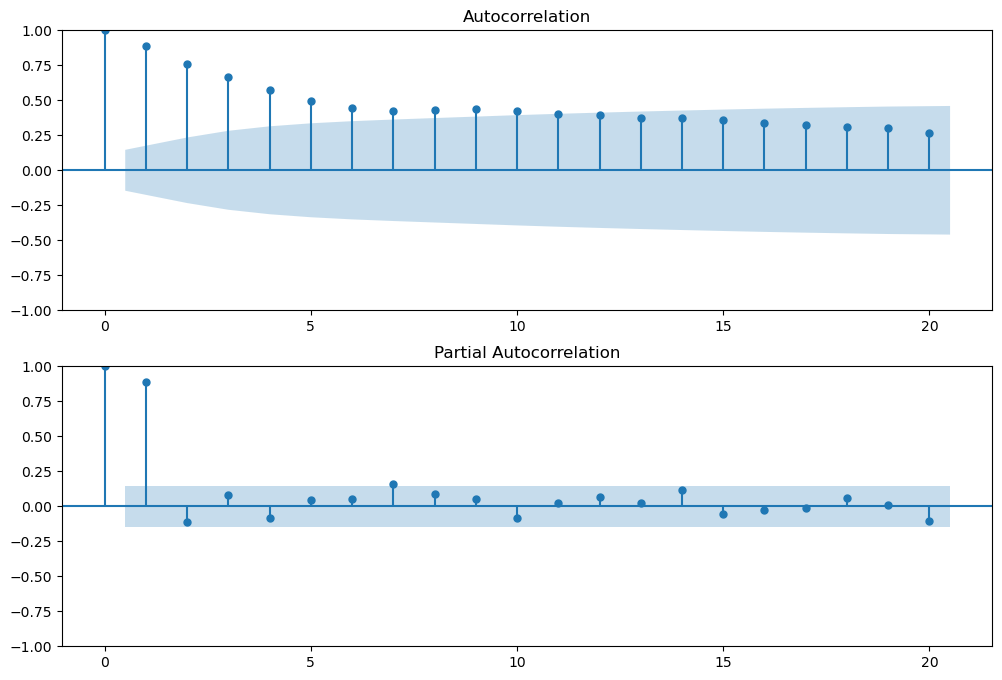

In [246]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_data_180, lags=20, ax=ax[0])
plot_pacf(train_data_180, lags=20, ax=ax[1])
plt.show()

In [247]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_180['Humidity'], order=(13,1,3))
model_fit = model.fit()

7 days

In [248]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13


In [249]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.61, 16.61, 16.66, 16.59, 16.58, 16.67, 16.76])

In [250]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.975


In [251]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

5.5352026786154624


In [252]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.8917259922006497

In [253]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

5.205957358571969

In [254]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.951084842125631

In [255]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.371


In [256]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.935


15 days

In [257]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13
2012-11-07,17.46
2012-12-07,18.31


In [258]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.61, 16.61, 16.66, 16.59, 16.58, 16.67, 16.76, 16.88, 16.92,
       16.73, 16.62, 16.74, 16.86, 16.84, 16.7 ])

In [259]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.236


In [260]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

6.812730174798971


In [261]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.1330835552646183

In [262]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

6.473054770975087

In [263]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.528517088123306

In [264]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.057


In [265]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.273


30 days

In [266]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13
2012-11-07,17.46
2012-12-07,18.31


In [267]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.61, 16.61, 16.66, 16.59, 16.58, 16.67, 16.76, 16.88, 16.92,
       16.73, 16.62, 16.74, 16.86, 16.84, 16.7 , 16.61, 16.67, 16.79,
       16.82, 16.75, 16.67, 16.68, 16.77, 16.83, 16.79, 16.7 , 16.66,
       16.73, 16.81, 16.8 ])

In [268]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.080


In [269]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

6.216639450257275


In [270]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.9597248131280256

In [271]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

5.6579235449005445

In [272]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.1671650333248598

In [273]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.057


In [274]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.966


Training Period = 360 days

In [275]:
train_size = int(len(data.iloc[-360:].iloc[:360]))
train_data_360, test_data = df[:train_size], df[train_size:]
train_data_360.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_360 = train_data_360.dropna()
test_data = test_data.dropna()
train_data_360

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-12-27,16.05
2012-12-28,17.15
2012-12-29,18.01


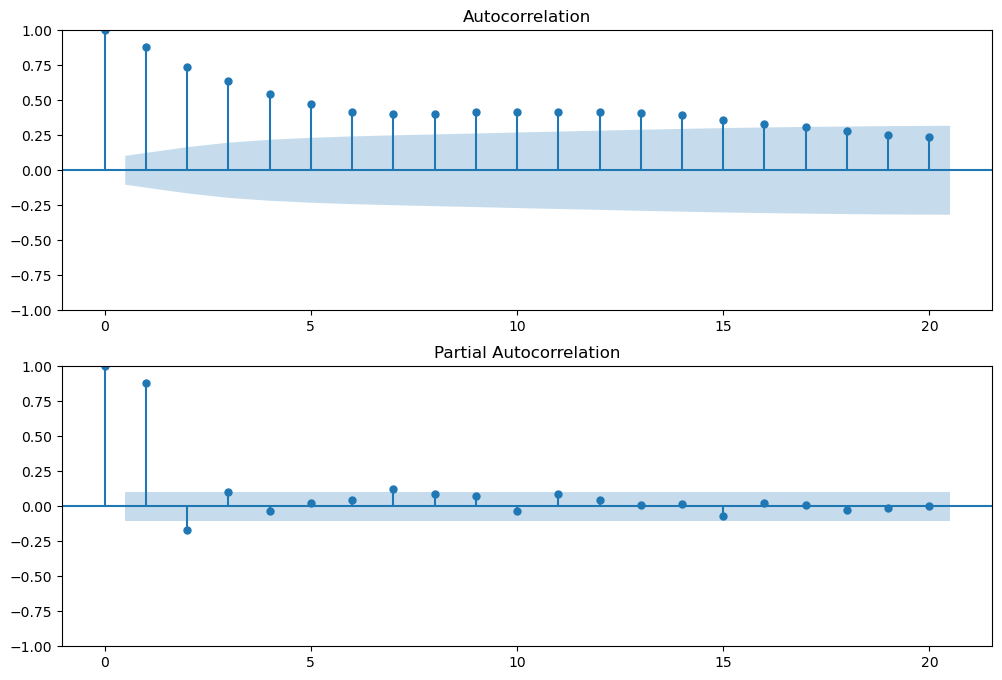

In [276]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_data_360, lags=20, ax=ax[0])
plot_pacf(train_data_360, lags=20, ax=ax[1])
plt.show()

In [277]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_360['Humidity'], order=(18,1,5))
model_fit = model.fit()

7 days

In [278]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32


In [279]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.97, 16.88, 16.47, 16.32, 16.2 , 16.41, 16.46])

In [280]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.038


In [281]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

6.751781677075829


In [282]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.8182947746993207

In [283]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

4.509512640760441

In [284]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.0769935067017382

In [285]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.934


In [286]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.770


15 days

In [287]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32
2013-08-01,15.08
2013-09-01,15.01


In [288]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.97, 16.88, 16.47, 16.32, 16.2 , 16.41, 16.46, 16.56, 16.74,
       16.76, 16.84, 16.83, 16.9 , 16.71, 16.58])

In [289]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.119


In [290]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

15.372458322373895


In [291]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.7724727516120902

In [292]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.842754407922909

In [293]:
mse = mean_squared_error(test_data_30, forecasting)
mse

4.488414797349166

In [294]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.964


In [295]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.726


30 days

In [296]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32
2013-08-01,15.08
2013-09-01,15.01


In [297]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.97, 16.88, 16.47, 16.32, 16.2 , 16.41, 16.46, 16.56, 16.74,
       16.76, 16.84, 16.83, 16.9 , 16.71, 16.58, 16.65, 16.65, 16.56,
       16.47, 16.66, 16.69, 16.6 , 16.58, 16.71, 16.73, 16.58, 16.6 ,
       16.67, 16.65, 16.54])

In [298]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.662


In [299]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

19.818145320084753


In [300]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.4059808170687433

In [301]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

17.239155540292302

In [302]:
mse = mean_squared_error(test_data_30, forecasting)
mse

7.085042571235379

In [303]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 4.057


In [304]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.453


Training Period = 540 days

In [305]:
train_size = int(len(data.iloc[-540:].iloc[:540]))
train_data_540, test_data = df[:train_size], df[train_size:]
train_data_540.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_540 = train_data_540.dropna()
test_data = test_data.dropna()
train_data_540

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2013-06-25,15.81
2013-06-26,17.40
2013-06-27,17.94


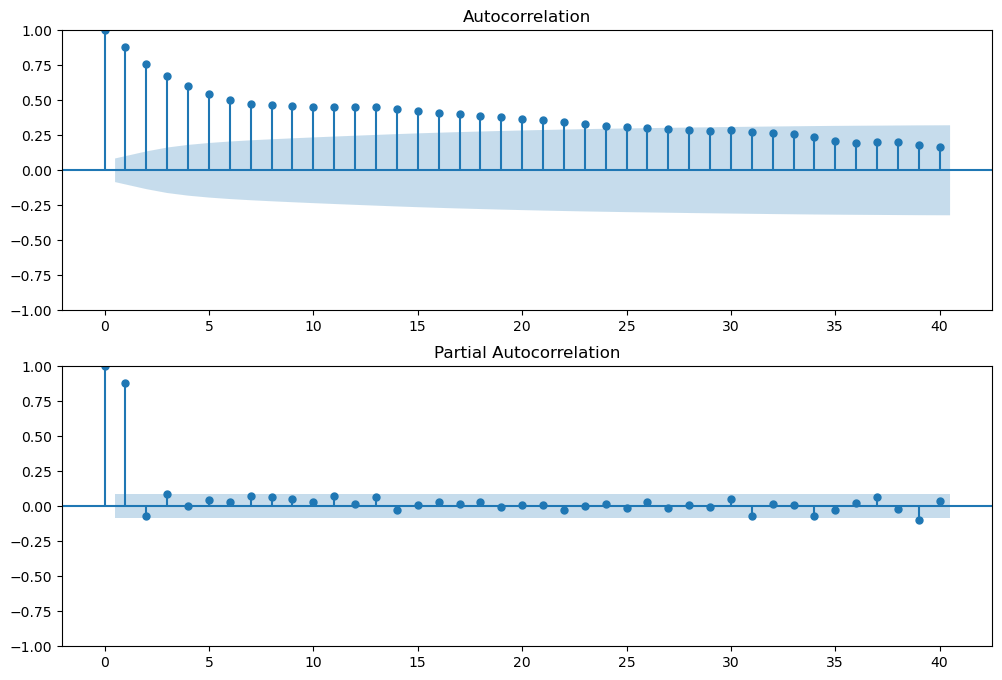

In [306]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_data_540, lags=40, ax=ax[0])
plot_pacf(train_data_540, lags=40, ax=ax[1])
plt.show()

In [307]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_540['Humidity'], order=(28,1,5))
model_fit = model.fit()

7 days

In [308]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07


In [309]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.23, 16.87, 16.87, 17.05, 16.83, 16.68, 16.65])

In [310]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.896


In [311]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

5.3286282864601


In [312]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.8177275180969585

In [313]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

4.11732670032842

In [314]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.8034773765149547

In [315]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.422


In [316]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.780


15 days 

In [317]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07
2013-07-07,17.46
2013-08-07,17.15


In [318]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.23, 16.87, 16.87, 17.05, 16.83, 16.68, 16.65, 16.99, 16.9 ,
       16.79, 17.01, 17.09, 16.88, 16.81, 16.87])

In [319]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.679


In [320]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

4.039394587095526


In [321]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.5640068001890437

In [322]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

3.014219344951806

In [323]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.4614105921537293

In [324]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.422


In [325]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.471


30 days

In [326]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07
2013-07-07,17.46
2013-08-07,17.15


In [327]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.23, 16.87, 16.87, 17.05, 16.83, 16.68, 16.65, 16.99, 16.9 ,
       16.79, 17.01, 17.09, 16.88, 16.81, 16.87, 17.02, 16.9 , 16.9 ,
       17.04, 16.93, 16.76, 16.89, 16.99, 16.9 , 16.81, 16.92, 16.96,
       16.84, 16.81, 16.97])

In [328]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.736


In [329]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

4.395959081272161


In [330]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.6269994918934425

In [331]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

3.499476423315807

In [332]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.5418934143743751

In [333]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.422


In [334]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.539


# SARIMAX

In [335]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Training Period = 30 days

In [336]:
train_size = int(len(data.iloc[-33:].iloc[:33]))
train_data_30, test_data = data[:train_size], data[train_size:]
train_data_30.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_30 = train_data_30.dropna()
test_data = test_data.dropna()
train_data_30

,Humidity
date,
2012-01-01,17.82
2012-01-02,13.37
2012-01-03,17.70
2012-01-04,15.99
2012-01-05,19.65
2012-01-06,14.89
2012-01-07,17.27
2012-01-08,15.81
2012-01-09,17.70


In [337]:
model = SARIMAX(train_data_30['Humidity'], order=(4, 1, 4), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit(disp=False)

7 days

In [338]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01


In [339]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.85, 13.32, 16.44, 15.4 , 15.84, 14.63, 14.28])

In [340]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.845


In [341]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

10.481243380511977


In [342]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.3958259667166772

In [343]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.070046076113828

In [344]:
mse = mean_squared_error(test_data_30, forecasting)
mse

3.4035104183407747

In [345]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.731


In [346]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.760


15 days

In [347]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01
2012-02-10,18.86
2012-02-11,19.35


In [348]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.85, 13.32, 16.44, 15.4 , 15.84, 14.63, 14.28, 13.75, 12.94,
       13.44, 15.76, 13.17, 16.05, 12.68, 14.74])

In [349]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.661


In [350]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

14.750736525632083


In [351]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.9680889430655113

In [352]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

12.846332433280649

In [353]:
mse = mean_squared_error(test_data_30, forecasting)
mse

7.083180198072804

In [354]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 6.413


In [355]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.403


30 days

In [356]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01
2012-02-10,18.86
2012-02-11,19.35


In [357]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.85, 13.32, 16.44, 15.4 , 15.84, 14.63, 14.28, 13.75, 12.94,
       13.44, 15.76, 13.17, 16.05, 12.68, 14.74, 14.14, 14.43, 13.68,
       13.7 , 13.11, 12.4 , 12.71, 15.75, 12.59, 16.  , 12.1 , 14.59,
       13.75, 14.13, 13.13])

In [358]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.498


In [359]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

14.315366011837618


In [360]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.7436478796782409

In [361]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

13.39820742515643

In [362]:
mse = mean_squared_error(test_data_30, forecasting)
mse

6.2376148522847945

In [363]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 6.413


In [364]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.856


Training Period = 90 days

In [365]:
train_size = int(len(data.iloc[-90:].iloc[:90]))
train_data_90, test_data = df[:train_size], df[train_size:]
train_data_90.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_90 = train_data_90.dropna()
test_data = test_data.dropna()
train_data_90

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-03-31,16.97
2012-01-04,15.99
2012-02-04,15.14


In [366]:
model = SARIMAX(train_data_90['Humidity'], order=(5, 1, 6), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit(disp=False)

7 days

In [367]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21


In [368]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([14.23, 15.  , 14.77, 14.97, 16.05, 15.47, 16.18])

In [369]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.840


In [370]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

10.677151743410471


In [371]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.7046340054839153

In [372]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

10.306180448823646

In [373]:
mse = mean_squared_error(test_data_30, forecasting)
mse

3.384706258648065

In [374]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.814


In [375]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.604


15 days

In [376]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21
2012-12-04,17.15
2012-04-13,17.03


In [377]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([14.23, 15.  , 14.77, 14.97, 16.05, 15.47, 16.18, 16.36, 15.59,
       15.59, 15.25, 14.79, 14.17, 14.45, 14.27])

In [378]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.086


In [379]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

12.06034160833114


In [380]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.911739129686999

In [381]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.277996227267657

In [382]:
mse = mean_squared_error(test_data_30, forecasting)
mse

4.352493819973247

In [383]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.426


In [384]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.618


30 days

In [385]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21
2012-12-04,17.15
2012-04-13,17.03


In [386]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([14.23, 15.  , 14.77, 14.97, 16.05, 15.47, 16.18, 16.36, 15.59,
       15.59, 15.25, 14.79, 14.17, 14.45, 14.27, 14.76, 15.86, 15.44,
       16.25, 16.34, 15.6 , 15.41, 14.94, 14.7 , 14.1 , 14.39, 14.35,
       14.71, 15.69, 15.38])

In [387]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.802


In [388]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

15.24641581016384


In [389]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.4819656526875757

In [390]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

13.883009085589318

In [391]:
mse = mean_squared_error(test_data_30, forecasting)
mse

7.851905549633629

In [392]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 5.297


In [393]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.335


Training Period = 180 days

In [394]:
train_size = int(len(data.iloc[-180:].iloc[:180]))
train_data_180, test_data = df[:train_size], df[train_size:]
train_data_180.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_180 = train_data_180.dropna()
test_data = test_data.dropna()
train_data_180

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-06-29,16.78
2012-06-30,17.64
2012-01-07,17.27


In [395]:
model = SARIMAX(train_data_180['Humidity'], order=(13, 1, 3), seasonal_order=(1, 1, 0, 14))
model_fit = model.fit(disp=False)

7 days

In [396]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13


In [397]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.56, 15.74, 15.96, 16.36, 16.62, 16.27, 17.48])

In [398]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.042


In [399]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

5.907455182772147


In [400]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.9311868475528602

In [401]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

6.626314047848653

In [402]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.0850922333167836

In [403]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.742


In [404]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.901


15 days

In [405]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13
2012-11-07,17.46
2012-12-07,18.31


In [406]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.56, 15.74, 15.96, 16.36, 16.62, 16.27, 17.48, 18.55, 18.79,
       17.91, 18.05, 17.45, 17.15, 16.19, 15.12])

In [407]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.296


In [408]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

7.168095928703318


In [409]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.032546548928648

In [410]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

7.319449489835648

In [411]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.6784797072493967

In [412]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.949


In [413]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.651


30 days

In [414]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13
2012-11-07,17.46
2012-12-07,18.31


In [415]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.56, 15.74, 15.96, 16.36, 16.62, 16.27, 17.48, 18.55, 18.79,
       17.91, 18.05, 17.45, 17.15, 16.19, 15.12, 15.29, 15.64, 16.52,
       17.35, 17.34, 17.91, 18.42, 18.49, 18.29, 18.73, 17.94, 17.31,
       16.91, 16.18, 16.45])

In [416]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.276


In [417]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

7.420976416281554


In [418]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.0860868952175422

In [419]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

6.976040600018614

In [420]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.627696274456519

In [421]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.949


In [422]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.080


Training Period = 360 days

In [423]:
train_size = int(len(data.iloc[-360:].iloc[:360]))
train_data_360, test_data = df[:train_size], df[train_size:]
train_data_360.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_360 = train_data_360.dropna()
test_data = test_data.dropna()
train_data_360

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-12-27,16.05
2012-12-28,17.15
2012-12-29,18.01


In [424]:
model = SARIMAX(train_data_360['Humidity'], order=(18, 1, 5), seasonal_order=(1, 1, 0, 19))
model_fit = model.fit(disp=False)

7 days

In [425]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32


In [426]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.84, 16.7 , 16.25, 15.68, 14.38, 14.06, 14.28])

In [427]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.630


In [428]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

10.080671581796006


In [429]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.4781937892921229

In [430]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

7.518634267666608

In [431]:
mse = mean_squared_error(test_data_30, forecasting)
mse

2.6584229859109585

In [432]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.363


In [433]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.410


15 days

In [434]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32
2013-08-01,15.08
2013-09-01,15.01


In [435]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.84, 16.7 , 16.25, 15.68, 14.38, 14.06, 14.28, 14.58, 14.79,
       16.21, 16.25, 16.37, 15.83, 15.28, 14.92])

In [436]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.732


In [437]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

11.979112146070152


In [438]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.5320581968950389

In [439]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

8.920869256680263

In [440]:
mse = mean_squared_error(test_data_30, forecasting)
mse

3.0010133697558947

In [441]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.894


In [442]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.621


30 days

In [443]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32
2013-08-01,15.08
2013-09-01,15.01


In [444]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.84, 16.7 , 16.25, 15.68, 14.38, 14.06, 14.28, 14.58, 14.79,
       16.21, 16.25, 16.37, 15.83, 15.28, 14.92, 15.23, 15.69, 16.28,
       16.22, 16.08, 15.88, 15.63, 15.27, 14.65, 14.5 , 14.72, 14.88,
       14.98, 15.43, 15.44])

In [445]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.862


In [446]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

13.61598097673169


In [447]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.6700784840144958

In [448]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.232776636743512

In [449]:
mse = mean_squared_error(test_data_30, forecasting)
mse

3.467869183077062

In [450]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.401


In [451]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.619


Training Period = 540 days

In [452]:
train_size = int(len(data.iloc[-540:].iloc[:540]))
train_data_540, test_data = df[:train_size], df[train_size:]
train_data_540.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_540 = train_data_540.dropna()
test_data = test_data.dropna()
train_data_540

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2013-06-25,15.81
2013-06-26,17.40
2013-06-27,17.94


In [453]:
model = SARIMAX(train_data_360['Humidity'], order=(28, 1, 5), seasonal_order=(1, 1, 0, 29))
model_fit = model.fit(disp=False)

7 days

In [454]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07


In [455]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.54, 17.23, 17.6 , 16.85, 16.31, 15.19, 14.35])

In [456]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.911


In [457]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

11.018866624179708


In [458]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.6053102446522736

In [459]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

6.850216979382075

In [460]:
mse = mean_squared_error(test_data_30, forecasting)
mse

3.653703924261499

In [461]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.719


In [462]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.118


15 days

In [463]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07
2013-07-07,17.46
2013-08-07,17.15


In [464]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.54, 17.23, 17.6 , 16.85, 16.31, 15.19, 14.35, 14.73, 14.98,
       15.2 , 14.57, 13.5 , 13.09, 13.2 , 12.9 ])

In [465]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.658


In [466]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

15.489134210237246


In [467]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.369183981391464

In [468]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

12.015693408314828

In [469]:
mse = mean_squared_error(test_data_30, forecasting)
mse

7.063193836938809

In [470]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 4.369


In [471]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.273


30 days

In [472]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07
2013-07-07,17.46
2013-08-07,17.15


In [473]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.54, 17.23, 17.6 , 16.85, 16.31, 15.19, 14.35, 14.73, 14.98,
       15.2 , 14.57, 13.5 , 13.09, 13.2 , 12.9 , 13.46, 15.08, 16.29,
       16.46, 15.81, 15.48, 15.31, 14.94, 14.71, 14.13, 14.61, 15.18,
       15.29, 14.86, 16.64])

In [474]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.442


In [475]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

14.123183661105898


In [476]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.160165357554149

In [477]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.395951033182074

In [478]:
mse = mean_squared_error(test_data_30, forecasting)
mse

5.965682894438716

In [479]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 4.674


In [480]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.166


# AR MODEL  

In [481]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order

Training Period = 30 days

In [482]:
train_size = int(len(data.iloc[-33:].iloc[:33]))
train_data_30, test_data = data[:train_size], data[train_size:]
train_data_30.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_30 = train_data_30.dropna()
test_data = test_data.dropna()
train_data_30

,Humidity
date,
2012-01-01,17.82
2012-01-02,13.37
2012-01-03,17.70
2012-01-04,15.99
2012-01-05,19.65
2012-01-06,14.89
2012-01-07,17.27
2012-01-08,15.81
2012-01-09,17.70


In [483]:
model = AutoReg(train_data_30, lags=4)
model_fit = model.fit()

7 days

In [484]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01


In [485]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.37, 12.99, 15.18, 13.54, 15.06, 13.61, 14.78])

In [486]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.352


In [487]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

13.6246279687589


In [488]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.205062853439931

In [489]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

13.020023420605112

In [490]:
mse = mean_squared_error(test_data_30, forecasting)
mse

5.5311059117729915

In [491]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.623


In [492]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.958


15 days

In [493]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01
2012-02-10,18.86
2012-02-11,19.35


In [494]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.37, 12.99, 15.18, 13.54, 15.06, 13.61, 14.78, 13.7 , 14.65,
       13.8 , 14.53, 13.87, 14.44, 13.92, 14.37])

In [495]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.487


In [496]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

13.835361191757759


In [497]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.0253231832975898

In [498]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.932916383099688

In [499]:
mse = mean_squared_error(test_data_30, forecasting)
mse

6.1861738132142

In [500]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 5.158


In [501]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.541


30 days

In [502]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-02-03,17.33
2012-02-04,15.14
2012-02-05,18.80
2012-02-06,15.14
2012-02-07,16.60
2012-02-08,14.95
2012-02-09,18.01
2012-02-10,18.86
2012-02-11,19.35


In [503]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([15.37, 12.99, 15.18, 13.54, 15.06, 13.61, 14.78, 13.7 , 14.65,
       13.8 , 14.53, 13.87, 14.44, 13.92, 14.37, 13.97, 14.32, 14.  ,
       14.28, 14.03, 14.24, 14.05, 14.22, 14.07, 14.2 , 14.08, 14.19,
       14.1 , 14.17, 14.1 ])

In [504]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.242


In [505]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

13.071085660183849


In [506]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.7957924487265884

In [507]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

11.320500574409749

In [508]:
mse = mean_squared_error(test_data_30, forecasting)
mse

5.026617233631966

In [509]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 5.158


In [510]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.308


Training Period = 90 days

In [511]:
train_size = int(len(data.iloc[-90:].iloc[:90]))
train_data_90, test_data = df[:train_size], df[train_size:]
train_data_90.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_90 = train_data_90.dropna()
test_data = test_data.dropna()
train_data_90

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-03-31,16.97
2012-01-04,15.99
2012-02-04,15.14


In [512]:
model = AutoReg(train_data_90, lags=6)
model_fit = model.fit()

7 days

In [513]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21


In [514]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([14.86, 14.95, 14.8 , 14.75, 14.79, 14.74, 14.76])

In [515]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.265


In [516]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

13.109001773300793


In [517]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.1360369353135176

In [518]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

12.445653114781338

In [519]:
mse = mean_squared_error(test_data_30, forecasting)
mse

5.129241002622669

In [520]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.781


In [521]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.453


15 days

In [522]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21
2012-12-04,17.15
2012-04-13,17.03


In [523]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([14.86, 14.95, 14.8 , 14.75, 14.79, 14.74, 14.76, 14.79, 14.76,
       14.77, 14.79, 14.78, 14.79, 14.79, 14.79])

In [524]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.336


In [525]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

13.5306647600696


In [526]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.2597464241376515

In [527]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

13.150659228550163

In [528]:
mse = mean_squared_error(test_data_30, forecasting)
mse

5.455999135585783

In [529]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.085


In [530]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.361


30 days

In [531]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-05-04,15.38
2012-06-04,16.60
2012-07-04,17.58
2012-08-04,17.52
2012-09-04,16.97
2012-10-04,17.33
2012-11-04,17.21
2012-12-04,17.15
2012-04-13,17.03


In [532]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([14.86, 14.95, 14.8 , 14.75, 14.79, 14.74, 14.76, 14.79, 14.76,
       14.77, 14.79, 14.78, 14.79, 14.79, 14.79, 14.79, 14.8 , 14.79,
       14.8 , 14.8 , 14.8 , 14.8 , 14.8 , 14.8 , 14.8 , 14.8 , 14.8 ,
       14.8 , 14.8 , 14.8 ])

In [533]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 3.023


In [534]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

16.600334562681727


In [535]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.8551320828789692

In [536]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

15.915737222105369

In [537]:
mse = mean_squared_error(test_data_30, forecasting)
mse

9.136595317423058

In [538]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 4.853


In [539]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.667


Training Period = 180 days

In [540]:
train_size = int(len(data.iloc[-180:].iloc[:180]))
train_data_180, test_data = df[:train_size], df[train_size:]
train_data_180.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_180 = train_data_180.dropna()
test_data = test_data.dropna()
train_data_180

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-06-29,16.78
2012-06-30,17.64
2012-01-07,17.27


In [541]:
model = AutoReg(train_data_180, lags=3)
model_fit = model.fit()

7 days

In [542]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13


In [543]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.58, 16.49, 16.42, 16.36, 16.3 , 16.25, 16.21])

In [544]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.257


In [545]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

7.079249582234752


In [546]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.1155405455588134

In [547]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

5.8461943442062045

In [548]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.5788644335892723

In [549]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.918


In [550]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.218


15 days

In [551]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13
2012-11-07,17.46
2012-12-07,18.31


In [552]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.58, 16.49, 16.42, 16.36, 16.3 , 16.25, 16.21, 16.17, 16.14,
       16.11, 16.09, 16.06, 16.04, 16.03, 16.01])

In [553]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.755


In [554]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

9.665063065076131


In [555]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.6126227969685443

In [556]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

8.57579128990078

In [557]:
mse = mean_squared_error(test_data_30, forecasting)
mse

3.0801536914437224

In [558]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.714


In [559]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.756


30 days

In [560]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2012-04-07,15.81
2012-05-07,16.30
2012-06-07,17.03
2012-07-07,17.70
2012-08-07,17.52
2012-09-07,18.01
2012-10-07,18.13
2012-11-07,17.46
2012-12-07,18.31


In [561]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([16.58, 16.49, 16.42, 16.36, 16.3 , 16.25, 16.21, 16.17, 16.14,
       16.11, 16.09, 16.06, 16.04, 16.03, 16.01, 16.  , 15.98, 15.97,
       15.96, 15.96, 15.95, 15.94, 15.94, 15.93, 15.93, 15.92, 15.92,
       15.92, 15.91, 15.91])

In [562]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.499


In [563]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

8.373149051264765


In [564]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.3108261303795021

In [565]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

7.472728865787132

In [566]:
mse = mean_squared_error(test_data_30, forecasting)
mse

2.246206318664307

In [567]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.714


In [568]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.336


Training Period = 360 days

In [569]:
train_size = int(len(data.iloc[-360:].iloc[:360]))
train_data_360, test_data = df[:train_size], df[train_size:]
train_data_360.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_360 = train_data_360.dropna()
test_data = test_data.dropna()
train_data_360

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2012-12-27,16.05
2012-12-28,17.15
2012-12-29,18.01


In [570]:
model = AutoReg(train_data_360, lags=5)
model_fit = model.fit()

7 days

In [571]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32


In [572]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.11, 17.08, 17.  , 16.94, 16.89, 16.84, 16.79])

In [573]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.143


In [574]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

7.491921611952808


In [575]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.8881498266675057

In [576]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

5.704409869629401

In [577]:
mse = mean_squared_error(test_data_30, forecasting)
mse

1.3071701226323993

In [578]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 2.127


In [579]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.457


15 days 

In [580]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32
2013-08-01,15.08
2013-09-01,15.01


In [581]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.11, 17.08, 17.  , 16.94, 16.89, 16.84, 16.79, 16.76, 16.73,
       16.7 , 16.68, 16.66, 16.64, 16.62, 16.61])

In [582]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.083


In [583]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

15.05273698418565


In [584]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

1.7706565956705054

In [585]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

12.645891766794565

In [586]:
mse = mean_squared_error(test_data_30, forecasting)
mse

4.340290247156259

In [587]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.697


In [588]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 1.716


30 days

In [589]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2013-01-01,15.69
2013-02-01,14.95
2013-03-01,16.54
2013-04-01,17.09
2013-05-01,16.72
2013-06-01,16.42
2013-07-01,15.32
2013-08-01,15.08
2013-09-01,15.01


In [590]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.11, 17.08, 17.  , 16.94, 16.89, 16.84, 16.79, 16.76, 16.73,
       16.7 , 16.68, 16.66, 16.64, 16.62, 16.61, 16.6 , 16.59, 16.58,
       16.57, 16.57, 16.56, 16.56, 16.55, 16.55, 16.54, 16.54, 16.54,
       16.54, 16.54, 16.53])

In [591]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.610


In [592]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

19.410209099130107


In [593]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

2.372597323627863

In [594]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

17.533747723522175

In [595]:
mse = mean_squared_error(test_data_30, forecasting)
mse

6.812116490322397

In [596]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 3.930


In [597]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 2.407


Training Period = 540 days

In [598]:
train_size = int(len(data.iloc[-540:].iloc[:540]))
train_data_540, test_data = df[:train_size], df[train_size:]
train_data_540.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data_540 = train_data_540.dropna()
test_data = test_data.dropna()
train_data_540

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2013-06-25,15.81
2013-06-26,17.40
2013-06-27,17.94


In [599]:
model = AutoReg(train_data_540, lags=5)
model_fit = model.fit()

7 days

In [600]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07


In [601]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.08, 17.  , 16.96, 16.91, 16.86, 16.81, 16.77])

In [602]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.860


In [603]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

5.155482873281201


In [604]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.7672967433915614

In [605]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

4.106863034821282

In [606]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.7390573373469156

In [607]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.302


In [608]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.672


15 days

In [609]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07
2013-07-07,17.46
2013-08-07,17.15


In [610]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.08, 17.  , 16.96, 16.91, 16.86, 16.81, 16.77, 16.73, 16.69,
       16.66, 16.64, 16.61, 16.59, 16.57, 16.55])

In [611]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.710


In [612]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

4.214108245770205


In [613]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.6283418246280679

In [614]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

3.1925565888797407

In [615]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.5038693999080838

In [616]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.302


In [617]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.648


30 days

In [618]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Humidity
date,
2013-06-30,16.66
2013-01-07,16.11
2013-02-07,15.69
2013-03-07,16.24
2013-04-07,17.03
2013-05-07,17.46
2013-06-07,18.07
2013-07-07,17.46
2013-08-07,17.15


In [619]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([17.08, 17.  , 16.96, 16.91, 16.86, 16.81, 16.77, 16.73, 16.69,
       16.66, 16.64, 16.61, 16.59, 16.57, 16.55, 16.53, 16.52, 16.5 ,
       16.49, 16.48, 16.47, 16.46, 16.45, 16.45, 16.44, 16.43, 16.43,
       16.42, 16.42, 16.41])

In [620]:
rmse = mean_squared_error(test_data_30, forecasting, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.834


In [621]:
loss = np.sqrt(np.mean(np.square(((test_data_30.Humidity.values - forecasting) / test_data_30.Humidity.values)), axis=0))
print(loss*100)

4.844914306856447


In [622]:
mae = mean_absolute_error(test_data_30, forecasting)
mae

0.7379166958214033

In [623]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

4.084486645817485

In [624]:
mse = mean_squared_error(test_data_30, forecasting)
mse

0.6956006452528947

In [625]:
print("Max Error %.3f" %max_error(test_data_30,forecasting))

Max Error 1.598


In [626]:
print("Median Error %.3f" %median_absolute_error(test_data_30,forecasting))

Median Error 0.713


# VAR

In [627]:
import statsmodels.api as sm
import warnings; warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR

Training Period = 30 days

In [628]:
train_size = int(len(data.iloc[-33:].iloc[:33]))
train_data_30, test_data = data[:train_size], data[train_size:]
train_data_30.drop(data.columns.difference(['Temperature','Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Temperature','Humidity']), axis=1, inplace=True)
train_data_30 = train_data_30.dropna()
test_data = test_data.dropna()
train_data_30

,Temperature,Humidity
date,,
2012-01-01,25.30,17.82
2012-01-02,23.39,13.37
2012-01-03,28.02,17.70
2012-01-04,29.18,15.99
2012-01-05,30.43,19.65
2012-01-06,33.97,14.89
2012-01-07,29.02,17.27
2012-01-08,30.13,15.81
2012-01-09,28.25,17.70


In [629]:
model = VAR(train_data_30)
sorted_order = model.select_order(maxlags=5)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       2.975       3.072       19.58       3.002
1       1.536       1.829       4.657       1.617
2       1.443       1.931       4.280       1.578
3       1.414       2.096       4.240       1.603
4      0.8638       1.741       2.538       1.107
5  -0.007598*      1.065*      1.129*     0.2899*
-------------------------------------------------


In [630]:
var_model = VARMAX(train_data_30, order=(1,0),enforce_stationarity= True)
model_fit = var_model.fit(disp=False)
print(model_fit.summary())

                                Statespace Model Results                               
Dep. Variable:     ['Temperature', 'Humidity']   No. Observations:                   30
Model:                                  VAR(1)   Log Likelihood                -112.248
                                   + intercept   AIC                            242.497
Date:                         Tue, 13 Jun 2023   BIC                            255.108
Time:                                 17:00:28   HQIC                           246.531
Sample:                                      0                                         
                                          - 30                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):             0.15, 0.00   Jarque-Bera (JB):           8.42, 1.62
Prob(Q):                        0.70, 0.95   Prob(JB):                   0.01, 0.45
Heteroskedasticity (H):         0.12, 0.

7 days

In [631]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Temperature,Humidity
date,,
2012-02-03,28.22,17.33
2012-02-04,29.37,15.14
2012-02-05,30.76,18.80
2012-02-06,34.48,15.14
2012-02-07,28.66,16.60
2012-02-08,30.41,14.95
2012-02-09,28.09,18.01


In [632]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[23.85, 14.05],
       [24.07, 14.16],
       [24.25, 14.27],
       [24.4 , 14.35],
       [24.53, 14.42],
       [24.63, 14.48],
       [24.71, 14.53]])

In [633]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.672


In [634]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

16.126681744243555

In [635]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

2.2442026885790485

In [636]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

15.691828808113902

In [637]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

7.138143344634598

In [638]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 4.535


In [639]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 2.177


15 days

In [640]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Temperature,Humidity
date,,
2012-02-03,28.22,17.33
2012-02-04,29.37,15.14
2012-02-05,30.76,18.80
2012-02-06,34.48,15.14
2012-02-07,28.66,16.60
2012-02-08,30.41,14.95
2012-02-09,28.09,18.01
2012-02-10,28.45,18.86
2012-02-11,27.15,19.35


In [641]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[23.85, 14.05],
       [24.07, 14.16],
       [24.25, 14.27],
       [24.4 , 14.35],
       [24.53, 14.42],
       [24.63, 14.48],
       [24.71, 14.53],
       [24.78, 14.57],
       [24.83, 14.6 ],
       [24.88, 14.63],
       [24.92, 14.65],
       [24.95, 14.67],
       [24.97, 14.68],
       [24.99, 14.69],
       [25.01, 14.7 ]])

In [642]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.476


In [643]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

15.208544662141954

In [644]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

1.7874471444994626

In [645]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

10.351513625293784

In [646]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

6.130333705969756

In [647]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 4.749


In [648]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 0.788


30 days

In [649]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Temperature,Humidity
date,,
2012-02-03,28.22,17.33
2012-02-04,29.37,15.14
2012-02-05,30.76,18.80
2012-02-06,34.48,15.14
2012-02-07,28.66,16.60
2012-02-08,30.41,14.95
2012-02-09,28.09,18.01
2012-02-10,28.45,18.86
2012-02-11,27.15,19.35


In [650]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[23.85, 14.05],
       [24.07, 14.16],
       [24.25, 14.27],
       [24.4 , 14.35],
       [24.53, 14.42],
       [24.63, 14.48],
       [24.71, 14.53],
       [24.78, 14.57],
       [24.83, 14.6 ],
       [24.88, 14.63],
       [24.92, 14.65],
       [24.95, 14.67],
       [24.97, 14.68],
       [24.99, 14.69],
       [25.01, 14.7 ],
       [25.03, 14.71],
       [25.04, 14.72],
       [25.05, 14.72],
       [25.05, 14.73],
       [25.06, 14.73],
       [25.07, 14.73],
       [25.07, 14.74],
       [25.07, 14.74],
       [25.08, 14.74],
       [25.08, 14.74],
       [25.08, 14.74],
       [25.08, 14.74],
       [25.08, 14.75],
       [25.09, 14.75],
       [25.09, 14.75]])

In [651]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.217


In [652]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

14.404302767834363

In [653]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

1.7439701047558775

In [654]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

9.473589403415177

In [655]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

4.917281399686568

In [656]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 4.749


In [657]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 1.584


Training Period = 90 days

In [658]:
train_size = int(len(data.iloc[-90:].iloc[:90]))
train_data_90, test_data = df[:train_size], df[train_size:]
train_data_90.drop(data.columns.difference(['Temperature','Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Temperature','Humidity']), axis=1, inplace=True)
train_data_90 = train_data_90.dropna()
test_data = test_data.dropna()
train_data_90

,Temperature,Humidity
date,,
2012-01-01,25.30,17.82
2012-02-01,25.49,17.52
2012-03-01,25.76,17.52
2012-04-01,25.57,17.58
2012-05-01,25.17,16.85
...,...,...
2012-03-31,29.79,16.97
2012-01-04,29.18,15.99
2012-02-04,29.37,15.14


In [659]:
model = VAR(train_data_90)
sorted_order = model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        1.725       1.785       5.612       1.749
1       -2.165      -1.986      0.1148      -2.093
2       -2.406     -2.109*     0.09018     -2.287*
3       -2.422      -2.005     0.08880      -2.255
4      -2.466*      -1.930    0.08512*      -2.251
5       -2.388      -1.733     0.09217      -2.125
6       -2.377      -1.603     0.09338      -2.066
7       -2.435      -1.542     0.08841      -2.077
8       -2.350      -1.338     0.09662      -1.944
9       -2.448      -1.316     0.08809      -1.994
10      -2.432      -1.182     0.09007      -1.931
--------------------------------------------------


In [660]:
var_model = VARMAX(train_data_90, order=(1,0),enforce_stationarity= True)
model_fit = var_model.fit(disp=False)
print(model_fit.summary())

                                Statespace Model Results                               
Dep. Variable:     ['Temperature', 'Humidity']   No. Observations:                   90
Model:                                  VAR(1)   Log Likelihood                -153.656
                                   + intercept   AIC                            325.312
Date:                         Tue, 13 Jun 2023   BIC                            347.811
Time:                                 17:00:29   HQIC                           334.385
Sample:                                      0                                         
                                          - 90                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):             7.84, 0.59   Jarque-Bera (JB):          0.23, 30.71
Prob(Q):                        0.01, 0.44   Prob(JB):                   0.89, 0.00
Heteroskedasticity (H):         1.50, 2.

7 days 

In [661]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Temperature,Humidity
date,,
2012-05-04,30.48,15.38
2012-06-04,30.45,16.60
2012-07-04,30.64,17.58
2012-08-04,30.60,17.52
2012-09-04,30.73,16.97
2012-10-04,30.98,17.33
2012-11-04,30.83,17.21


In [662]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[30.21, 15.21],
       [30.33, 15.49],
       [30.42, 15.72],
       [30.5 , 15.93],
       [30.57, 16.1 ],
       [30.62, 16.25],
       [30.67, 16.37]])

In [663]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.189


In [664]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

7.017310958117889

In [665]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

1.0751705338862048

In [666]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

3.4440854464804946

In [667]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

1.4133232447130653

In [668]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 1.856


In [669]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 1.085


15 days

In [670]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Temperature,Humidity
date,,
2012-05-04,30.48,15.38
2012-06-04,30.45,16.60
2012-07-04,30.64,17.58
2012-08-04,30.60,17.52
2012-09-04,30.73,16.97
2012-10-04,30.98,17.33
2012-11-04,30.83,17.21
2012-12-04,30.89,17.15
2012-04-13,30.92,17.03


In [671]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[30.21, 15.21],
       [30.33, 15.49],
       [30.42, 15.72],
       [30.5 , 15.93],
       [30.57, 16.1 ],
       [30.62, 16.25],
       [30.67, 16.37],
       [30.71, 16.48],
       [30.74, 16.57],
       [30.76, 16.65],
       [30.78, 16.71],
       [30.79, 16.77],
       [30.8 , 16.82],
       [30.81, 16.86],
       [30.81, 16.89]])

In [672]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.907


In [673]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

5.321520299285638

In [674]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

0.7643932191056657

In [675]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

2.76361904376808

In [676]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

0.823550070005886

In [677]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 1.856


In [678]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 0.672


30 days 

In [679]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Temperature,Humidity
date,,
2012-05-04,30.48,15.38
2012-06-04,30.45,16.60
2012-07-04,30.64,17.58
2012-08-04,30.60,17.52
2012-09-04,30.73,16.97
2012-10-04,30.98,17.33
2012-11-04,30.83,17.21
2012-12-04,30.89,17.15
2012-04-13,30.92,17.03


In [680]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[30.21, 15.21],
       [30.33, 15.49],
       [30.42, 15.72],
       [30.5 , 15.93],
       [30.57, 16.1 ],
       [30.62, 16.25],
       [30.67, 16.37],
       [30.71, 16.48],
       [30.74, 16.57],
       [30.76, 16.65],
       [30.78, 16.71],
       [30.79, 16.77],
       [30.8 , 16.82],
       [30.81, 16.86],
       [30.81, 16.89],
       [30.81, 16.92],
       [30.81, 16.94],
       [30.81, 16.96],
       [30.81, 16.97],
       [30.8 , 16.99],
       [30.79, 17.  ],
       [30.79, 17.01],
       [30.78, 17.01],
       [30.77, 17.02],
       [30.76, 17.02],
       [30.75, 17.02],
       [30.74, 17.02],
       [30.73, 17.02],
       [30.72, 17.02],
       [30.71, 17.02]])

In [681]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.277


In [682]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

7.236838082432411

In [683]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

1.0578056162773322

In [684]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

3.8054763804572436

In [685]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

1.6315618235567528

In [686]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 2.627


In [687]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 0.855


Training Period = 180 days 

In [688]:
train_size = int(len(data.iloc[-180:].iloc[:180]))
train_data_180, test_data = df[:train_size], df[train_size:]
train_data_180.drop(data.columns.difference(['Temperature','Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Temperature','Humidity']), axis=1, inplace=True)
train_data_180 = train_data_180.dropna()
test_data = test_data.dropna()
train_data_180

,Temperature,Humidity
date,,
2012-01-01,25.30,17.82
2012-02-01,25.49,17.52
2012-03-01,25.76,17.52
2012-04-01,25.57,17.58
2012-05-01,25.17,16.85
...,...,...
2012-06-29,29.67,16.78
2012-06-30,29.05,17.64
2012-01-07,29.02,17.27


In [689]:
model = VAR(train_data_180)
sorted_order = model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.035       3.072       20.80       3.050
1     -0.7813*    -0.6707*     0.4578*    -0.7364*
2      -0.7684     -0.5839      0.4638     -0.6935
3      -0.7470     -0.4887      0.4738     -0.6422
4      -0.7515     -0.4195      0.4717     -0.6168
5      -0.7592     -0.3534      0.4682     -0.5945
6      -0.7202     -0.2406      0.4870     -0.5256
7      -0.7049     -0.1515      0.4946     -0.4803
8      -0.7042    -0.07701      0.4952     -0.4497
9      -0.7558    -0.05490      0.4705     -0.4714
10     -0.7352     0.03956      0.4806     -0.4208
--------------------------------------------------


In [690]:
var_model = VARMAX(train_data_180, order=(1,0),enforce_stationarity= True)
model_fit = var_model.fit(disp=False)
print(model_fit.summary())

                                Statespace Model Results                               
Dep. Variable:     ['Temperature', 'Humidity']   No. Observations:                  180
Model:                                  VAR(1)   Log Likelihood                -431.637
                                   + intercept   AIC                            881.274
Date:                         Tue, 13 Jun 2023   BIC                            910.010
Time:                                 17:00:30   HQIC                           892.925
Sample:                                      0                                         
                                         - 180                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):             1.22, 2.57   Jarque-Bera (JB):        110.95, 24.87
Prob(Q):                        0.27, 0.11   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         5.77, 1.

7 days 

In [691]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Temperature,Humidity
date,,
2012-04-07,30.34,15.81
2012-05-07,30.94,16.30
2012-06-07,30.01,17.03
2012-07-07,30.15,17.70
2012-08-07,29.44,17.52
2012-09-07,28.70,18.01
2012-10-07,29.12,18.13


In [692]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[29.79, 16.57],
       [29.76, 16.54],
       [29.73, 16.52],
       [29.71, 16.5 ],
       [29.68, 16.48],
       [29.65, 16.46],
       [29.62, 16.44]])

In [693]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.113


In [694]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

6.4637346251763566

In [695]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

0.9987602765939452

In [696]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

3.841269207992511

In [697]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

1.2380695697767845

In [698]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 1.685


In [699]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 1.041


15 days 

In [700]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Temperature,Humidity
date,,
2012-04-07,30.34,15.81
2012-05-07,30.94,16.30
2012-06-07,30.01,17.03
2012-07-07,30.15,17.70
2012-08-07,29.44,17.52
2012-09-07,28.70,18.01
2012-10-07,29.12,18.13
2012-11-07,29.51,17.46
2012-12-07,30.00,18.31


In [701]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[29.79, 16.57],
       [29.76, 16.54],
       [29.73, 16.52],
       [29.71, 16.5 ],
       [29.68, 16.48],
       [29.65, 16.46],
       [29.62, 16.44],
       [29.6 , 16.43],
       [29.57, 16.42],
       [29.54, 16.4 ],
       [29.52, 16.39],
       [29.5 , 16.38],
       [29.47, 16.37],
       [29.45, 16.36],
       [29.43, 16.35]])

In [702]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.518


In [703]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

8.572561824317873

In [704]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

1.396420823379298

In [705]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

5.132082978597432

In [706]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

2.303024910408505

In [707]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 2.384


In [708]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 1.549


30 days 

In [709]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Temperature,Humidity
date,,
2012-04-07,30.34,15.81
2012-05-07,30.94,16.30
2012-06-07,30.01,17.03
2012-07-07,30.15,17.70
2012-08-07,29.44,17.52
2012-09-07,28.70,18.01
2012-10-07,29.12,18.13
2012-11-07,29.51,17.46
2012-12-07,30.00,18.31


In [710]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[29.79, 16.57],
       [29.76, 16.54],
       [29.73, 16.52],
       [29.71, 16.5 ],
       [29.68, 16.48],
       [29.65, 16.46],
       [29.62, 16.44],
       [29.6 , 16.43],
       [29.57, 16.42],
       [29.54, 16.4 ],
       [29.52, 16.39],
       [29.5 , 16.38],
       [29.47, 16.37],
       [29.45, 16.36],
       [29.43, 16.35],
       [29.4 , 16.34],
       [29.38, 16.33],
       [29.36, 16.32],
       [29.34, 16.31],
       [29.32, 16.3 ],
       [29.3 , 16.29],
       [29.28, 16.28],
       [29.27, 16.28],
       [29.25, 16.27],
       [29.23, 16.26],
       [29.21, 16.25],
       [29.2 , 16.25],
       [29.18, 16.24],
       [29.17, 16.23],
       [29.15, 16.23]])

In [711]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.281


In [712]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

7.44306334059714

In [713]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

1.1386758410411906

In [714]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

4.550704425132984

In [715]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

1.6422346265236

In [716]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 2.384


In [717]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 1.163


Training Period = 360 days

In [718]:
train_size = int(len(data.iloc[-360:].iloc[:360]))
train_data_360, test_data = df[:train_size], df[train_size:]
train_data_360.drop(data.columns.difference(['Temperature','Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Temperature','Humidity']), axis=1, inplace=True)
train_data_360 = train_data_360.dropna()
test_data = test_data.dropna()
train_data_360

,Temperature,Humidity
date,,
2012-01-01,25.30,17.82
2012-02-01,25.49,17.52
2012-03-01,25.76,17.52
2012-04-01,25.57,17.58
2012-05-01,25.17,16.85
...,...,...
2012-12-27,24.72,16.05
2012-12-28,25.20,17.15
2012-12-29,25.69,18.01


In [719]:
model = VAR(train_data_360)
sorted_order = model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        2.938       2.960       18.88       2.947
1       -1.107     -1.041*      0.3304      -1.081
2       -1.120      -1.009      0.3264      -1.076
3       -1.145     -0.9902      0.3184     -1.083*
4       -1.149     -0.9510      0.3168      -1.070
5       -1.140     -0.8978      0.3197      -1.044
6       -1.131     -0.8447      0.3226      -1.017
7       -1.133     -0.8021      0.3222      -1.001
8       -1.140     -0.7652      0.3199     -0.9908
9      -1.169*     -0.7500     0.3108*      -1.002
10      -1.152     -0.6890      0.3161     -0.9677
--------------------------------------------------


In [720]:
var_model = VARMAX(train_data_360, order=(1,0),enforce_stationarity= True)
model_fit = var_model.fit(disp=False)
print(model_fit.summary())

                                Statespace Model Results                               
Dep. Variable:     ['Temperature', 'Humidity']   No. Observations:                  360
Model:                                  VAR(1)   Log Likelihood                -811.680
                                   + intercept   AIC                           1641.360
Date:                         Tue, 13 Jun 2023   BIC                           1676.335
Time:                                 17:00:32   HQIC                          1655.266
Sample:                                      0                                         
                                         - 360                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):             0.44, 8.48   Jarque-Bera (JB):        294.04, 30.02
Prob(Q):                        0.51, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.96, 1.

7 days 

In [721]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Temperature,Humidity
date,,
2013-01-01,25.12,15.69
2013-02-01,23.98,14.95
2013-03-01,24.89,16.54
2013-04-01,25.32,17.09
2013-05-01,25.30,16.72
2013-06-01,25.21,16.42
2013-07-01,24.65,15.32


In [722]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[26.01, 17.19],
       [26.08, 17.02],
       [26.14, 16.87],
       [26.2 , 16.75],
       [26.25, 16.64],
       [26.31, 16.56],
       [26.36, 16.49]])

In [723]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.078


In [724]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

6.694707070193756

In [725]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

0.8033009630068795

In [726]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

5.151172414643886

In [727]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

1.1623745484693884

In [728]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 2.065


In [729]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 0.344


15 days 

In [730]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Temperature,Humidity
date,,
2013-01-01,25.12,15.69
2013-02-01,23.98,14.95
2013-03-01,24.89,16.54
2013-04-01,25.32,17.09
2013-05-01,25.30,16.72
2013-06-01,25.21,16.42
2013-07-01,24.65,15.32
2013-08-01,24.93,15.08
2013-09-01,24.79,15.01


In [731]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[26.01, 17.19],
       [26.08, 17.02],
       [26.14, 16.87],
       [26.2 , 16.75],
       [26.25, 16.64],
       [26.31, 16.56],
       [26.36, 16.49],
       [26.4 , 16.43],
       [26.45, 16.38],
       [26.49, 16.35],
       [26.54, 16.31],
       [26.58, 16.29],
       [26.62, 16.27],
       [26.65, 16.26],
       [26.69, 16.25]])

In [732]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 1.835


In [733]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

12.192222064398079

In [734]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

1.5414041958359161

In [735]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

9.469950590590468

In [736]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

3.367562588466657

In [737]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 3.331


In [738]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 1.501


30 days 

In [739]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Temperature,Humidity
date,,
2013-01-01,25.12,15.69
2013-02-01,23.98,14.95
2013-03-01,24.89,16.54
2013-04-01,25.32,17.09
2013-05-01,25.30,16.72
2013-06-01,25.21,16.42
2013-07-01,24.65,15.32
2013-08-01,24.93,15.08
2013-09-01,24.79,15.01


In [740]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[26.01, 17.19],
       [26.08, 17.02],
       [26.14, 16.87],
       [26.2 , 16.75],
       [26.25, 16.64],
       [26.31, 16.56],
       [26.36, 16.49],
       [26.4 , 16.43],
       [26.45, 16.38],
       [26.49, 16.35],
       [26.54, 16.31],
       [26.58, 16.29],
       [26.62, 16.27],
       [26.65, 16.26],
       [26.69, 16.25],
       [26.72, 16.24],
       [26.76, 16.23],
       [26.79, 16.23],
       [26.82, 16.23],
       [26.85, 16.23],
       [26.88, 16.23],
       [26.91, 16.23],
       [26.93, 16.23],
       [26.96, 16.24],
       [26.99, 16.24],
       [27.01, 16.25],
       [27.03, 16.25],
       [27.06, 16.26],
       [27.08, 16.26],
       [27.1 , 16.27]])

In [741]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.331


In [742]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

16.281918356456416

In [743]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

2.1001569870679675

In [744]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

12.196132030974319

In [745]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

5.433691434371109

In [746]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 3.599


In [747]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 2.165


Training Period = 540 days

In [748]:
train_size = int(len(data.iloc[-540:].iloc[:540]))
train_data_540, test_data = df[:train_size], df[train_size:]
train_data_540.drop(data.columns.difference(['Temperature','Humidity']), axis=1, inplace=True)
test_data.drop(data.columns.difference(['Temperature','Humidity']), axis=1, inplace=True)
train_data_540 = train_data_540.dropna()
test_data = test_data.dropna()
train_data_540

,Temperature,Humidity
date,,
2012-01-01,25.30,17.82
2012-02-01,25.49,17.52
2012-03-01,25.76,17.52
2012-04-01,25.57,17.58
2012-05-01,25.17,16.85
...,...,...
2013-06-25,31.15,15.81
2013-06-26,30.71,17.40
2013-06-27,29.62,17.94


In [749]:
model = VAR(train_data_540)
sorted_order = model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        2.902       2.918       18.21       2.908
1       -1.100     -1.052*      0.3329     -1.081*
2       -1.098      -1.017      0.3336      -1.066
3       -1.109     -0.9959      0.3300      -1.065
4       -1.109     -0.9638      0.3299      -1.052
5       -1.101     -0.9233      0.3327      -1.031
6       -1.104     -0.8946      0.3315      -1.022
7       -1.099     -0.8567      0.3334      -1.004
8       -1.098     -0.8238      0.3336     -0.9906
9      -1.115*     -0.8091     0.3278*     -0.9956
10      -1.102     -0.7635      0.3322     -0.9695
--------------------------------------------------


In [750]:
var_model = VARMAX(train_data_540, order=(1,0),enforce_stationarity= True)
model_fit = var_model.fit(disp=False)
print(model_fit.summary())

                                Statespace Model Results                               
Dep. Variable:     ['Temperature', 'Humidity']   No. Observations:                  540
Model:                                  VAR(1)   Log Likelihood               -1225.405
                                   + intercept   AIC                           2468.809
Date:                         Tue, 13 Jun 2023   BIC                           2507.433
Time:                                 17:00:33   HQIC                          2483.915
Sample:                                      0                                         
                                         - 540                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):             0.34, 3.00   Jarque-Bera (JB):        384.76, 95.24
Prob(Q):                        0.56, 0.08   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.63, 1.

7 days 

In [751]:
test_data_30 = test_data.iloc[:7]
test_data_30

,Temperature,Humidity
date,,
2013-06-30,29.15,16.66
2013-01-07,29.16,16.11
2013-02-07,29.73,15.69
2013-03-07,28.40,16.24
2013-04-07,29.43,17.03
2013-05-07,29.19,17.46
2013-06-07,29.62,18.07


In [752]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[29.69, 17.17],
       [29.65, 17.14],
       [29.6 , 17.1 ],
       [29.56, 17.08],
       [29.52, 17.05],
       [29.48, 17.02],
       [29.44, 17.  ]])

In [753]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.874


In [754]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

5.2183757244894515

In [755]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

0.7589455634290656

In [756]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

3.00582125742221

In [757]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

0.7641425619207133

In [758]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 1.415


In [759]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 0.836


15 days 

In [760]:
test_data_30 = test_data.iloc[:15]
test_data_30

,Temperature,Humidity
date,,
2013-06-30,29.15,16.66
2013-01-07,29.16,16.11
2013-02-07,29.73,15.69
2013-03-07,28.40,16.24
2013-04-07,29.43,17.03
2013-05-07,29.19,17.46
2013-06-07,29.62,18.07
2013-07-07,28.77,17.46
2013-08-07,28.92,17.15


In [761]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[29.69, 17.17],
       [29.65, 17.14],
       [29.6 , 17.1 ],
       [29.56, 17.08],
       [29.52, 17.05],
       [29.48, 17.02],
       [29.44, 17.  ],
       [29.4 , 16.98],
       [29.36, 16.96],
       [29.33, 16.94],
       [29.29, 16.92],
       [29.26, 16.9 ],
       [29.23, 16.89],
       [29.2 , 16.87],
       [29.17, 16.86]])

In [762]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.655


In [763]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

3.8727297014320943

In [764]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

0.53250592680303

In [765]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

2.4543484804927855

In [766]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

0.4291365381545743

In [767]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 1.415


In [768]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 0.436


30 days 

In [769]:
test_data_30 = test_data.iloc[:30]
test_data_30

,Temperature,Humidity
date,,
2013-06-30,29.15,16.66
2013-01-07,29.16,16.11
2013-02-07,29.73,15.69
2013-03-07,28.40,16.24
2013-04-07,29.43,17.03
2013-05-07,29.19,17.46
2013-06-07,29.62,18.07
2013-07-07,28.77,17.46
2013-08-07,28.92,17.15


In [770]:
forecasting = model_fit.forecast(len(test_data_30))
np.array(forecasting).round(2)

array([[29.69, 17.17],
       [29.65, 17.14],
       [29.6 , 17.1 ],
       [29.56, 17.08],
       [29.52, 17.05],
       [29.48, 17.02],
       [29.44, 17.  ],
       [29.4 , 16.98],
       [29.36, 16.96],
       [29.33, 16.94],
       [29.29, 16.92],
       [29.26, 16.9 ],
       [29.23, 16.89],
       [29.2 , 16.87],
       [29.17, 16.86],
       [29.14, 16.84],
       [29.11, 16.83],
       [29.08, 16.82],
       [29.05, 16.8 ],
       [29.02, 16.79],
       [29.  , 16.78],
       [28.97, 16.77],
       [28.95, 16.76],
       [28.93, 16.75],
       [28.9 , 16.74],
       [28.88, 16.73],
       [28.86, 16.72],
       [28.84, 16.71],
       [28.82, 16.7 ],
       [28.8 , 16.69]])

In [771]:
rmse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'], squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 0.725


In [772]:
rmspe_Humidity = rmse / mean(test_data_30['Humidity']) * 100
rmspe_Humidity

4.274046516416558

In [773]:
mae = mean_absolute_error(test_data_30['Humidity'], forecasting['Humidity'])
mae

0.616810691718694

In [774]:
def mape(test_data_30, forecasting):
    test_data_30, forecasting = np.array(test_data_30), np.array(forecasting)
    return np.mean(np.abs((test_data_30 - forecasting) / test_data_30)) * 100
mape_value = mape(test_data_30, forecasting)
mape_value

2.7956598443324756

In [775]:
mse = mean_squared_error(test_data_30['Humidity'], forecasting['Humidity'])
mse

0.5263163779606456

In [776]:
print("Max Error %.3f" %max_error(test_data_30['Humidity'], forecasting['Humidity']))

Max Error 1.415


In [777]:
print("Median Error %.3f" %median_absolute_error(test_data_30['Humidity'], forecasting['Humidity']))

Median Error 0.606


# LSTM

In [778]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler

Training Period = 30 days

7 days

In [779]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [780]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(data.iloc[-33:].iloc[:33]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+7, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [781]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
1/1 - 2s - loss: 0.0245 - val_loss: 0.0464 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 0.0190 - val_loss: 0.0378 - 30ms/epoch - 30ms/step
Epoch 3/50
1/1 - 0s - loss: 0.0148 - val_loss: 0.0303 - 33ms/epoch - 33ms/step
Epoch 4/50
1/1 - 0s - loss: 0.0110 - val_loss: 0.0237 - 29ms/epoch - 29ms/step
Epoch 5/50
1/1 - 0s - loss: 0.0080 - val_loss: 0.0181 - 32ms/epoch - 32ms/step
Epoch 6/50
1/1 - 0s - loss: 0.0059 - val_loss: 0.0134 - 37ms/epoch - 37ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0045 - val_loss: 0.0097 - 31ms/epoch - 31ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0031 - val_loss: 0.0069 - 32ms/epoch - 32ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0026 - val_loss: 0.0048 - 31ms/epoch - 31ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0027 - val_loss: 0.0035 - 32ms/epoch - 32ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0031 - val_loss: 0.0027 - 31ms/epoch - 31ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0036 - val_loss: 0.0023 - 31ms/epoch - 31ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0039 - val_loss: 0.002

In [782]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 0.722
Root Mean Square Percentage Error for LSTM is: 2.844%
Mean absolute Error: 0.647
Mean absolute percentage Error: 2.569%
Mean Squared Error: 0.521
Max Error 1.251
Median Error 0.614


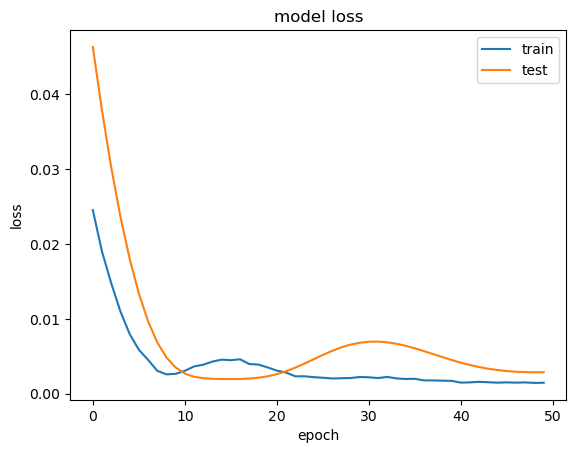

In [783]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

15 days

In [784]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [785]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(df.iloc[-33:].iloc[:33]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+15, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [786]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
1/1 - 2s - loss: 0.0318 - val_loss: 0.0585 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 0.0262 - val_loss: 0.0496 - 42ms/epoch - 42ms/step
Epoch 3/50
1/1 - 0s - loss: 0.0207 - val_loss: 0.0415 - 31ms/epoch - 31ms/step
Epoch 4/50
1/1 - 0s - loss: 0.0160 - val_loss: 0.0342 - 32ms/epoch - 32ms/step
Epoch 5/50
1/1 - 0s - loss: 0.0122 - val_loss: 0.0277 - 32ms/epoch - 32ms/step
Epoch 6/50
1/1 - 0s - loss: 0.0088 - val_loss: 0.0221 - 32ms/epoch - 32ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0064 - val_loss: 0.0174 - 33ms/epoch - 33ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0044 - val_loss: 0.0134 - 36ms/epoch - 36ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0034 - val_loss: 0.0102 - 33ms/epoch - 33ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0026 - val_loss: 0.0078 - 40ms/epoch - 40ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0024 - val_loss: 0.0060 - 32ms/epoch - 32ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0025 - val_loss: 0.0047 - 32ms/epoch - 32ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0029 - val_loss: 0.003

In [787]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 1.037
Root Mean Square Percentage Error for LSTM is: 4.094%
Mean absolute Error: 0.948
Mean absolute percentage Error: 3.758%
Mean Squared Error: 1.075
Max Error 1.841
Median Error 0.983


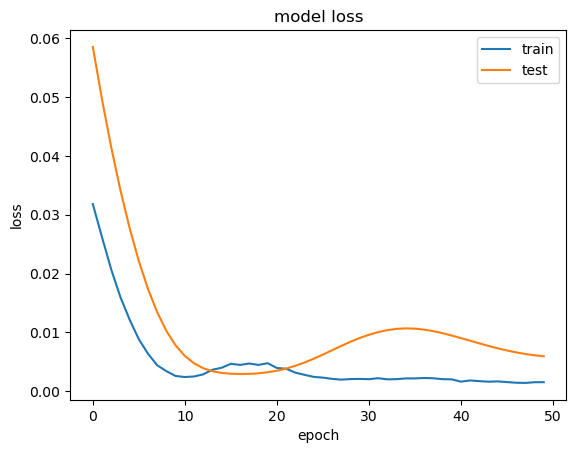

In [788]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

30 days

In [789]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [790]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(df.iloc[-33:].iloc[:33]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+30, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [791]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
1/1 - 2s - loss: 0.0313 - val_loss: 0.1069 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 0.0251 - val_loss: 0.0953 - 33ms/epoch - 33ms/step
Epoch 3/50
1/1 - 0s - loss: 0.0198 - val_loss: 0.0845 - 31ms/epoch - 31ms/step
Epoch 4/50
1/1 - 0s - loss: 0.0150 - val_loss: 0.0745 - 34ms/epoch - 34ms/step
Epoch 5/50
1/1 - 0s - loss: 0.0115 - val_loss: 0.0654 - 32ms/epoch - 32ms/step
Epoch 6/50
1/1 - 0s - loss: 0.0084 - val_loss: 0.0571 - 32ms/epoch - 32ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0061 - val_loss: 0.0497 - 32ms/epoch - 32ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0044 - val_loss: 0.0431 - 31ms/epoch - 31ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0030 - val_loss: 0.0373 - 32ms/epoch - 32ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0024 - val_loss: 0.0325 - 32ms/epoch - 32ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0021 - val_loss: 0.0284 - 31ms/epoch - 31ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0022 - val_loss: 0.0251 - 29ms/epoch - 29ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0025 - val_loss: 0.022

In [792]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 2.111
Root Mean Square Percentage Error for LSTM is: 7.747%
Mean absolute Error: 1.834
Mean absolute percentage Error: 6.859%
Mean Squared Error: 4.456
Max Error 3.862
Median Error 1.769


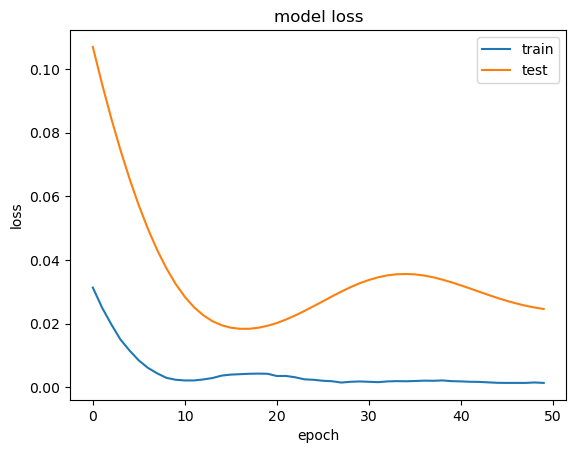

In [793]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Training Period = 90 days

7 days 

In [794]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [795]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(df.iloc[-90:].iloc[:90]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+7, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [796]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
2/2 - 2s - loss: 0.1410 - val_loss: 0.3989 - 2s/epoch - 991ms/step
Epoch 2/50
2/2 - 0s - loss: 0.1152 - val_loss: 0.3382 - 39ms/epoch - 19ms/step
Epoch 3/50
2/2 - 0s - loss: 0.0937 - val_loss: 0.2828 - 40ms/epoch - 20ms/step
Epoch 4/50
2/2 - 0s - loss: 0.0747 - val_loss: 0.2326 - 43ms/epoch - 21ms/step
Epoch 5/50
2/2 - 0s - loss: 0.0583 - val_loss: 0.1876 - 45ms/epoch - 22ms/step
Epoch 6/50
2/2 - 0s - loss: 0.0461 - val_loss: 0.1476 - 41ms/epoch - 20ms/step
Epoch 7/50
2/2 - 0s - loss: 0.0361 - val_loss: 0.1128 - 51ms/epoch - 25ms/step
Epoch 8/50
2/2 - 0s - loss: 0.0279 - val_loss: 0.0833 - 44ms/epoch - 22ms/step
Epoch 9/50
2/2 - 0s - loss: 0.0231 - val_loss: 0.0591 - 47ms/epoch - 24ms/step
Epoch 10/50
2/2 - 0s - loss: 0.0205 - val_loss: 0.0401 - 51ms/epoch - 26ms/step
Epoch 11/50
2/2 - 0s - loss: 0.0193 - val_loss: 0.0259 - 42ms/epoch - 21ms/step
Epoch 12/50
2/2 - 0s - loss: 0.0209 - val_loss: 0.0159 - 37ms/epoch - 18ms/step
Epoch 13/50
2/2 - 0s - loss: 0.0243 - val_loss: 0.

In [797]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 1.395
Root Mean Square Percentage Error for LSTM is: 4.543%
Mean absolute Error: 1.376
Mean absolute percentage Error: 4.485%
Mean Squared Error: 1.946
Max Error 1.651
Median Error 1.398


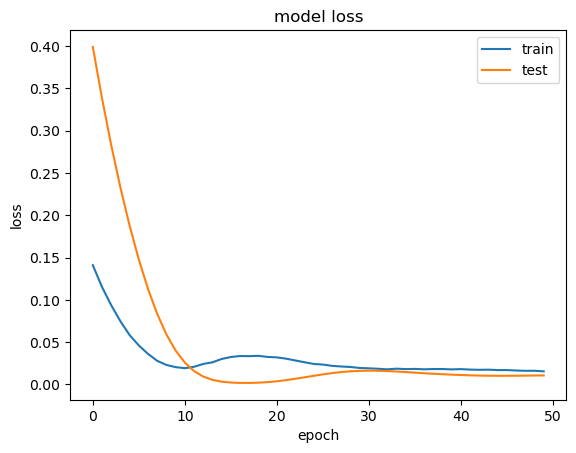

In [798]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

15 days

In [799]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [800]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(df.iloc[-90:].iloc[:90]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+15, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [801]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
2/2 - 2s - loss: 0.1361 - val_loss: 0.3851 - 2s/epoch - 1s/step
Epoch 2/50
2/2 - 0s - loss: 0.1116 - val_loss: 0.3305 - 54ms/epoch - 27ms/step
Epoch 3/50
2/2 - 0s - loss: 0.0908 - val_loss: 0.2801 - 51ms/epoch - 25ms/step
Epoch 4/50
2/2 - 0s - loss: 0.0720 - val_loss: 0.2339 - 39ms/epoch - 20ms/step
Epoch 5/50
2/2 - 0s - loss: 0.0574 - val_loss: 0.1920 - 38ms/epoch - 19ms/step
Epoch 6/50
2/2 - 0s - loss: 0.0443 - val_loss: 0.1545 - 37ms/epoch - 19ms/step
Epoch 7/50
2/2 - 0s - loss: 0.0343 - val_loss: 0.1214 - 40ms/epoch - 20ms/step
Epoch 8/50
2/2 - 0s - loss: 0.0268 - val_loss: 0.0931 - 39ms/epoch - 19ms/step
Epoch 9/50
2/2 - 0s - loss: 0.0224 - val_loss: 0.0694 - 37ms/epoch - 19ms/step
Epoch 10/50
2/2 - 0s - loss: 0.0202 - val_loss: 0.0504 - 39ms/epoch - 19ms/step
Epoch 11/50
2/2 - 0s - loss: 0.0202 - val_loss: 0.0357 - 37ms/epoch - 18ms/step
Epoch 12/50
2/2 - 0s - loss: 0.0211 - val_loss: 0.0250 - 36ms/epoch - 18ms/step
Epoch 13/50
2/2 - 0s - loss: 0.0240 - val_loss: 0.017

In [802]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 1.496
Root Mean Square Percentage Error for LSTM is: 4.844%
Mean absolute Error: 1.460
Mean absolute percentage Error: 4.737%
Mean Squared Error: 2.239
Max Error 2.000
Median Error 1.436


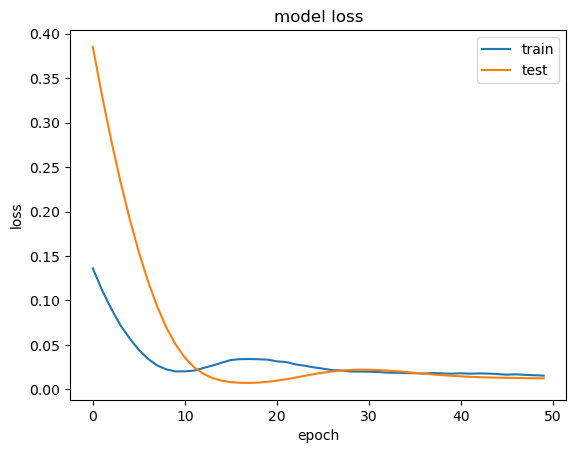

In [803]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

30 days

In [804]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [805]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(df.iloc[-90:].iloc[:90]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+30, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [806]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
2/2 - 2s - loss: 0.1347 - val_loss: 0.3914 - 2s/epoch - 1s/step
Epoch 2/50
2/2 - 0s - loss: 0.1111 - val_loss: 0.3387 - 39ms/epoch - 20ms/step
Epoch 3/50
2/2 - 0s - loss: 0.0900 - val_loss: 0.2901 - 40ms/epoch - 20ms/step
Epoch 4/50
2/2 - 0s - loss: 0.0724 - val_loss: 0.2455 - 40ms/epoch - 20ms/step
Epoch 5/50
2/2 - 0s - loss: 0.0574 - val_loss: 0.2048 - 40ms/epoch - 20ms/step
Epoch 6/50
2/2 - 0s - loss: 0.0454 - val_loss: 0.1681 - 40ms/epoch - 20ms/step
Epoch 7/50
2/2 - 0s - loss: 0.0355 - val_loss: 0.1355 - 39ms/epoch - 20ms/step
Epoch 8/50
2/2 - 0s - loss: 0.0285 - val_loss: 0.1071 - 39ms/epoch - 19ms/step
Epoch 9/50
2/2 - 0s - loss: 0.0233 - val_loss: 0.0830 - 38ms/epoch - 19ms/step
Epoch 10/50
2/2 - 0s - loss: 0.0204 - val_loss: 0.0631 - 38ms/epoch - 19ms/step
Epoch 11/50
2/2 - 0s - loss: 0.0198 - val_loss: 0.0474 - 40ms/epoch - 20ms/step
Epoch 12/50
2/2 - 0s - loss: 0.0217 - val_loss: 0.0355 - 36ms/epoch - 18ms/step
Epoch 13/50
2/2 - 0s - loss: 0.0240 - val_loss: 0.026

In [807]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 1.616
Root Mean Square Percentage Error for LSTM is: 5.140%
Mean absolute Error: 1.438
Mean absolute percentage Error: 4.627%
Mean Squared Error: 2.612
Max Error 3.986
Median Error 1.397


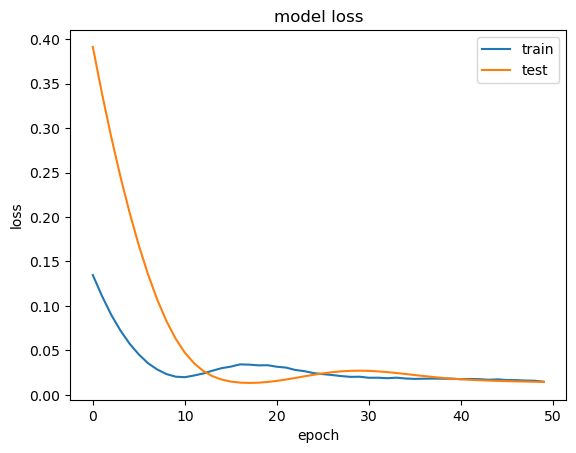

In [808]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Training Period = 180 days

7 days

In [809]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [810]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(data.iloc[-180:].iloc[:180]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+7, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [811]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
3/3 - 2s - loss: 0.2929 - val_loss: 0.2797 - 2s/epoch - 661ms/step
Epoch 2/50
3/3 - 0s - loss: 0.2356 - val_loss: 0.2143 - 70ms/epoch - 23ms/step
Epoch 3/50
3/3 - 0s - loss: 0.1846 - val_loss: 0.1575 - 69ms/epoch - 23ms/step
Epoch 4/50
3/3 - 0s - loss: 0.1415 - val_loss: 0.1097 - 55ms/epoch - 18ms/step
Epoch 5/50
3/3 - 0s - loss: 0.1054 - val_loss: 0.0712 - 54ms/epoch - 18ms/step
Epoch 6/50
3/3 - 0s - loss: 0.0783 - val_loss: 0.0423 - 49ms/epoch - 16ms/step
Epoch 7/50
3/3 - 0s - loss: 0.0579 - val_loss: 0.0229 - 50ms/epoch - 17ms/step
Epoch 8/50
3/3 - 0s - loss: 0.0453 - val_loss: 0.0123 - 48ms/epoch - 16ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0379 - val_loss: 0.0090 - 48ms/epoch - 16ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0373 - val_loss: 0.0104 - 47ms/epoch - 16ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0385 - val_loss: 0.0138 - 52ms/epoch - 17ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0406 - val_loss: 0.0171 - 46ms/epoch - 15ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0443 - val_loss: 0.

In [812]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 1.541
Root Mean Square Percentage Error for LSTM is: 5.292%
Mean absolute Error: 1.282
Mean absolute percentage Error: 4.369%
Mean Squared Error: 2.374
Max Error 2.667
Median Error 1.231


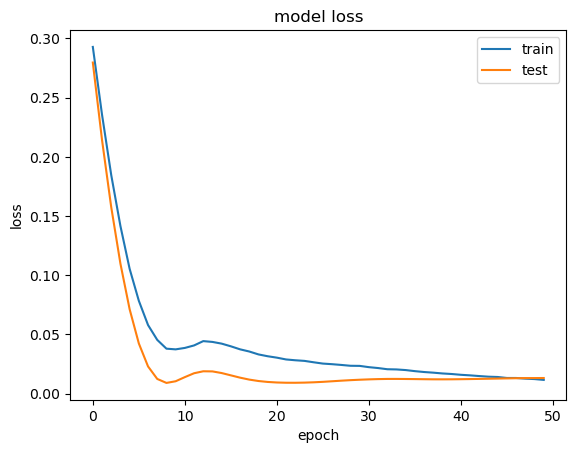

In [813]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

15 days

In [814]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [815]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(data.iloc[-180:].iloc[:180]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+15, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [816]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
3/3 - 2s - loss: 0.2691 - val_loss: 0.2151 - 2s/epoch - 678ms/step
Epoch 2/50
3/3 - 0s - loss: 0.2134 - val_loss: 0.1572 - 62ms/epoch - 21ms/step
Epoch 3/50
3/3 - 0s - loss: 0.1667 - val_loss: 0.1081 - 52ms/epoch - 17ms/step
Epoch 4/50
3/3 - 0s - loss: 0.1260 - val_loss: 0.0684 - 50ms/epoch - 17ms/step
Epoch 5/50
3/3 - 0s - loss: 0.0912 - val_loss: 0.0386 - 52ms/epoch - 17ms/step
Epoch 6/50
3/3 - 0s - loss: 0.0667 - val_loss: 0.0190 - 51ms/epoch - 17ms/step
Epoch 7/50
3/3 - 0s - loss: 0.0482 - val_loss: 0.0092 - 47ms/epoch - 16ms/step
Epoch 8/50
3/3 - 0s - loss: 0.0375 - val_loss: 0.0080 - 47ms/epoch - 16ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0345 - val_loss: 0.0128 - 48ms/epoch - 16ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0347 - val_loss: 0.0203 - 50ms/epoch - 17ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0373 - val_loss: 0.0273 - 53ms/epoch - 18ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0398 - val_loss: 0.0316 - 50ms/epoch - 17ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0406 - val_loss: 0.

In [817]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 1.685
Root Mean Square Percentage Error for LSTM is: 5.841%
Mean absolute Error: 1.517
Mean absolute percentage Error: 5.233%
Mean Squared Error: 2.841
Max Error 2.626
Median Error 1.577


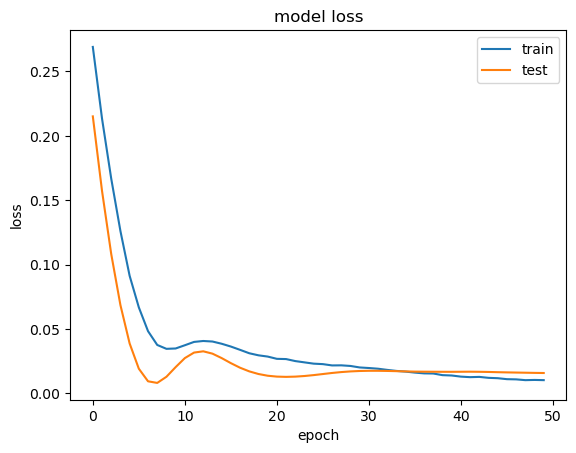

In [818]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

30 days

In [819]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [820]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(data.iloc[-180:].iloc[:180]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+30, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [821]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
3/3 - 2s - loss: 0.2645 - val_loss: 0.2412 - 2s/epoch - 696ms/step
Epoch 2/50
3/3 - 0s - loss: 0.2099 - val_loss: 0.1816 - 68ms/epoch - 23ms/step
Epoch 3/50
3/3 - 0s - loss: 0.1631 - val_loss: 0.1304 - 62ms/epoch - 21ms/step
Epoch 4/50
3/3 - 0s - loss: 0.1223 - val_loss: 0.0880 - 50ms/epoch - 17ms/step
Epoch 5/50
3/3 - 0s - loss: 0.0899 - val_loss: 0.0549 - 47ms/epoch - 16ms/step
Epoch 6/50
3/3 - 0s - loss: 0.0661 - val_loss: 0.0311 - 51ms/epoch - 17ms/step
Epoch 7/50
3/3 - 0s - loss: 0.0484 - val_loss: 0.0164 - 56ms/epoch - 19ms/step
Epoch 8/50
3/3 - 0s - loss: 0.0392 - val_loss: 0.0097 - 60ms/epoch - 20ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0362 - val_loss: 0.0089 - 64ms/epoch - 21ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0373 - val_loss: 0.0114 - 52ms/epoch - 17ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0385 - val_loss: 0.0147 - 55ms/epoch - 18ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0411 - val_loss: 0.0171 - 52ms/epoch - 17ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0422 - val_loss: 0.

In [822]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 1.382
Root Mean Square Percentage Error for LSTM is: 4.742%
Mean absolute Error: 1.205
Mean absolute percentage Error: 4.101%
Mean Squared Error: 1.911
Max Error 2.594
Median Error 1.237


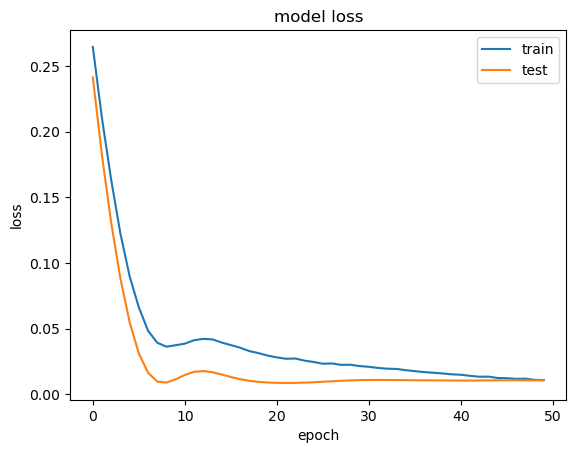

In [823]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Training Period = 360 days

7 days

In [824]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [825]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(data.iloc[-360:].iloc[:360]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+7, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [826]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
6/6 - 3s - loss: 0.1979 - val_loss: 0.0086 - 3s/epoch - 419ms/step
Epoch 2/50
6/6 - 0s - loss: 0.1160 - val_loss: 0.0020 - 94ms/epoch - 16ms/step
Epoch 3/50
6/6 - 0s - loss: 0.0665 - val_loss: 0.0151 - 85ms/epoch - 14ms/step
Epoch 4/50
6/6 - 0s - loss: 0.0458 - val_loss: 0.0335 - 79ms/epoch - 13ms/step
Epoch 5/50
6/6 - 0s - loss: 0.0387 - val_loss: 0.0428 - 86ms/epoch - 14ms/step
Epoch 6/50
6/6 - 0s - loss: 0.0354 - val_loss: 0.0406 - 82ms/epoch - 14ms/step
Epoch 7/50
6/6 - 0s - loss: 0.0335 - val_loss: 0.0332 - 84ms/epoch - 14ms/step
Epoch 8/50
6/6 - 0s - loss: 0.0317 - val_loss: 0.0261 - 83ms/epoch - 14ms/step
Epoch 9/50
6/6 - 0s - loss: 0.0310 - val_loss: 0.0216 - 81ms/epoch - 14ms/step
Epoch 10/50
6/6 - 0s - loss: 0.0299 - val_loss: 0.0195 - 79ms/epoch - 13ms/step
Epoch 11/50
6/6 - 0s - loss: 0.0281 - val_loss: 0.0190 - 81ms/epoch - 14ms/step
Epoch 12/50
6/6 - 0s - loss: 0.0266 - val_loss: 0.0194 - 85ms/epoch - 14ms/step
Epoch 13/50
6/6 - 0s - loss: 0.0246 - val_loss: 0.

In [827]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 0.769
Root Mean Square Percentage Error for LSTM is: 3.142%
Mean absolute Error: 0.639
Mean absolute percentage Error: 2.586%
Mean Squared Error: 0.591
Max Error 1.486
Median Error 0.503


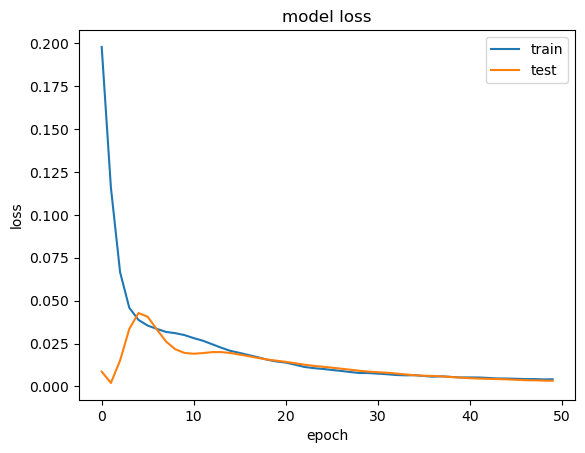

In [828]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

15 days

In [829]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [830]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(data.iloc[-360:].iloc[:360]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+15, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [831]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
6/6 - 2s - loss: 0.2149 - val_loss: 0.0101 - 2s/epoch - 376ms/step
Epoch 2/50
6/6 - 0s - loss: 0.1243 - val_loss: 0.0017 - 79ms/epoch - 13ms/step
Epoch 3/50
6/6 - 0s - loss: 0.0705 - val_loss: 0.0130 - 77ms/epoch - 13ms/step
Epoch 4/50
6/6 - 0s - loss: 0.0460 - val_loss: 0.0307 - 79ms/epoch - 13ms/step
Epoch 5/50
6/6 - 0s - loss: 0.0372 - val_loss: 0.0401 - 79ms/epoch - 13ms/step
Epoch 6/50
6/6 - 0s - loss: 0.0345 - val_loss: 0.0381 - 77ms/epoch - 13ms/step
Epoch 7/50
6/6 - 0s - loss: 0.0314 - val_loss: 0.0304 - 92ms/epoch - 15ms/step
Epoch 8/50
6/6 - 0s - loss: 0.0295 - val_loss: 0.0229 - 76ms/epoch - 13ms/step
Epoch 9/50
6/6 - 0s - loss: 0.0292 - val_loss: 0.0181 - 78ms/epoch - 13ms/step
Epoch 10/50
6/6 - 0s - loss: 0.0285 - val_loss: 0.0156 - 87ms/epoch - 14ms/step
Epoch 11/50
6/6 - 0s - loss: 0.0268 - val_loss: 0.0145 - 75ms/epoch - 13ms/step
Epoch 12/50
6/6 - 0s - loss: 0.0256 - val_loss: 0.0143 - 78ms/epoch - 13ms/step
Epoch 13/50
6/6 - 0s - loss: 0.0235 - val_loss: 0.

In [832]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 0.696
Root Mean Square Percentage Error for LSTM is: 2.867%
Mean absolute Error: 0.601
Mean absolute percentage Error: 2.464%
Mean Squared Error: 0.485
Max Error 1.503
Median Error 0.600


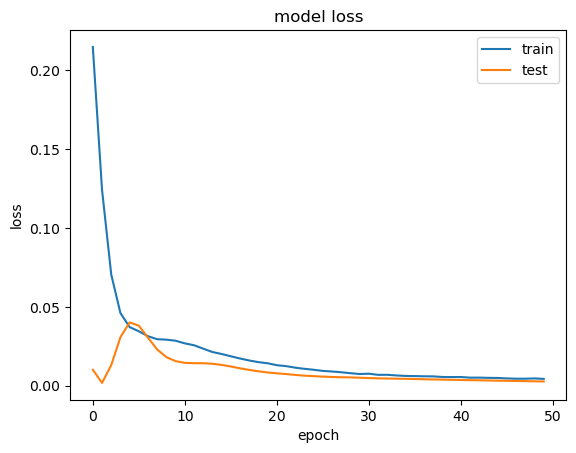

In [833]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

30 days

In [834]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [835]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(data.iloc[-360:].iloc[:360]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+30, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [836]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
6/6 - 2s - loss: 0.2440 - val_loss: 0.0146 - 2s/epoch - 377ms/step
Epoch 2/50
6/6 - 0s - loss: 0.1505 - val_loss: 0.0021 - 78ms/epoch - 13ms/step
Epoch 3/50
6/6 - 0s - loss: 0.0889 - val_loss: 0.0057 - 80ms/epoch - 13ms/step
Epoch 4/50
6/6 - 0s - loss: 0.0560 - val_loss: 0.0184 - 76ms/epoch - 13ms/step
Epoch 5/50
6/6 - 0s - loss: 0.0428 - val_loss: 0.0292 - 77ms/epoch - 13ms/step
Epoch 6/50
6/6 - 0s - loss: 0.0384 - val_loss: 0.0314 - 79ms/epoch - 13ms/step
Epoch 7/50
6/6 - 0s - loss: 0.0355 - val_loss: 0.0273 - 80ms/epoch - 13ms/step
Epoch 8/50
6/6 - 0s - loss: 0.0335 - val_loss: 0.0216 - 80ms/epoch - 13ms/step
Epoch 9/50
6/6 - 0s - loss: 0.0325 - val_loss: 0.0170 - 79ms/epoch - 13ms/step
Epoch 10/50
6/6 - 0s - loss: 0.0320 - val_loss: 0.0143 - 79ms/epoch - 13ms/step
Epoch 11/50
6/6 - 0s - loss: 0.0307 - val_loss: 0.0129 - 77ms/epoch - 13ms/step
Epoch 12/50
6/6 - 0s - loss: 0.0297 - val_loss: 0.0125 - 77ms/epoch - 13ms/step
Epoch 13/50
6/6 - 0s - loss: 0.0275 - val_loss: 0.

In [837]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 0.576
Root Mean Square Percentage Error for LSTM is: 2.366%
Mean absolute Error: 0.458
Mean absolute percentage Error: 1.875%
Mean Squared Error: 0.331
Max Error 1.617
Median Error 0.392


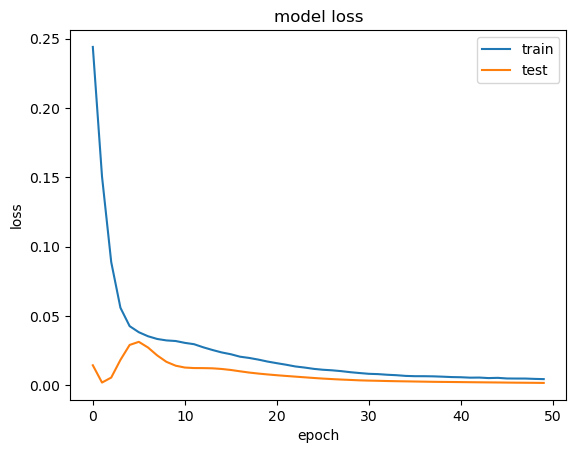

In [838]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Training Period = 540 days

7 days

In [839]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [840]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(data.iloc[-540:].iloc[:540]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+7, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [841]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
8/8 - 2s - loss: 0.2052 - val_loss: 0.1586 - 2s/epoch - 254ms/step
Epoch 2/50
8/8 - 0s - loss: 0.0962 - val_loss: 0.0635 - 97ms/epoch - 12ms/step
Epoch 3/50
8/8 - 0s - loss: 0.0452 - val_loss: 0.0181 - 100ms/epoch - 13ms/step
Epoch 4/50
8/8 - 0s - loss: 0.0363 - val_loss: 0.0064 - 101ms/epoch - 13ms/step
Epoch 5/50
8/8 - 0s - loss: 0.0371 - val_loss: 0.0056 - 106ms/epoch - 13ms/step
Epoch 6/50
8/8 - 0s - loss: 0.0335 - val_loss: 0.0075 - 116ms/epoch - 15ms/step
Epoch 7/50
8/8 - 0s - loss: 0.0289 - val_loss: 0.0099 - 126ms/epoch - 16ms/step
Epoch 8/50
8/8 - 0s - loss: 0.0269 - val_loss: 0.0101 - 117ms/epoch - 15ms/step
Epoch 9/50
8/8 - 0s - loss: 0.0250 - val_loss: 0.0085 - 130ms/epoch - 16ms/step
Epoch 10/50
8/8 - 0s - loss: 0.0229 - val_loss: 0.0066 - 116ms/epoch - 15ms/step
Epoch 11/50
8/8 - 0s - loss: 0.0212 - val_loss: 0.0053 - 116ms/epoch - 14ms/step
Epoch 12/50
8/8 - 0s - loss: 0.0194 - val_loss: 0.0048 - 126ms/epoch - 16ms/step
Epoch 13/50
8/8 - 0s - loss: 0.0180 - va

In [842]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 0.799
Root Mean Square Percentage Error for LSTM is: 2.766%
Mean absolute Error: 0.684
Mean absolute percentage Error: 2.353%
Mean Squared Error: 0.638
Max Error 1.492
Median Error 0.734


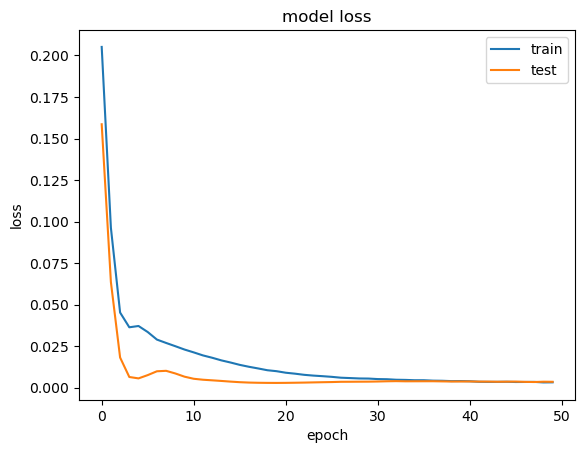

In [843]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

15 days

In [844]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [845]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(data.iloc[-540:].iloc[:540]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+15, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [846]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
8/8 - 2s - loss: 0.2157 - val_loss: 0.1483 - 2s/epoch - 270ms/step
Epoch 2/50
8/8 - 0s - loss: 0.1061 - val_loss: 0.0534 - 92ms/epoch - 11ms/step
Epoch 3/50
8/8 - 0s - loss: 0.0498 - val_loss: 0.0117 - 97ms/epoch - 12ms/step
Epoch 4/50
8/8 - 0s - loss: 0.0371 - val_loss: 0.0050 - 101ms/epoch - 13ms/step
Epoch 5/50
8/8 - 0s - loss: 0.0383 - val_loss: 0.0049 - 89ms/epoch - 11ms/step
Epoch 6/50
8/8 - 0s - loss: 0.0347 - val_loss: 0.0044 - 88ms/epoch - 11ms/step
Epoch 7/50
8/8 - 0s - loss: 0.0304 - val_loss: 0.0050 - 125ms/epoch - 16ms/step
Epoch 8/50
8/8 - 0s - loss: 0.0278 - val_loss: 0.0052 - 89ms/epoch - 11ms/step
Epoch 9/50
8/8 - 0s - loss: 0.0259 - val_loss: 0.0046 - 95ms/epoch - 12ms/step
Epoch 10/50
8/8 - 0s - loss: 0.0241 - val_loss: 0.0038 - 118ms/epoch - 15ms/step
Epoch 11/50
8/8 - 0s - loss: 0.0224 - val_loss: 0.0032 - 89ms/epoch - 11ms/step
Epoch 12/50
8/8 - 0s - loss: 0.0206 - val_loss: 0.0029 - 113ms/epoch - 14ms/step
Epoch 13/50
8/8 - 0s - loss: 0.0188 - val_loss

In [847]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 0.701
Root Mean Square Percentage Error for LSTM is: 2.450%
Mean absolute Error: 0.582
Mean absolute percentage Error: 2.022%
Mean Squared Error: 0.492
Max Error 1.497
Median Error 0.469


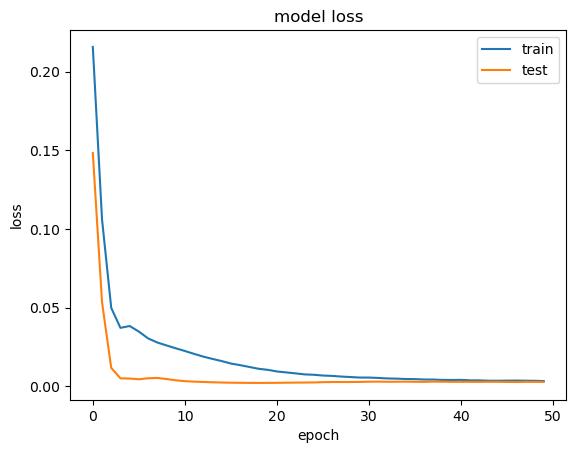

In [848]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

30 days

In [849]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
from sklearn.preprocessing import MinMaxScaler

In [850]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_time = int(len(data.iloc[-540:].iloc[:540]))
train = values[:n_train_time, :]
test = values[n_train_time:n_train_time+30, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [851]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

size = df.shape[1]

# Prediction train
llll = model.predict(train_x)
train_x = train_x.reshape((train_x.shape[0], size))

# invert scaling for prediction
pred_x = np.concatenate((llll, train_x[:, 1-size:]), axis=1)
pred_x = scaler.inverse_transform(pred_x)
pred_x = pred_x[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_x[:, 1-size:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#########################################################
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Epoch 1/50
8/8 - 2s - loss: 0.1982 - val_loss: 0.1218 - 2s/epoch - 260ms/step
Epoch 2/50
8/8 - 0s - loss: 0.0938 - val_loss: 0.0379 - 93ms/epoch - 12ms/step
Epoch 3/50
8/8 - 0s - loss: 0.0450 - val_loss: 0.0066 - 89ms/epoch - 11ms/step
Epoch 4/50
8/8 - 0s - loss: 0.0368 - val_loss: 0.0044 - 88ms/epoch - 11ms/step
Epoch 5/50
8/8 - 0s - loss: 0.0374 - val_loss: 0.0044 - 90ms/epoch - 11ms/step
Epoch 6/50
8/8 - 0s - loss: 0.0334 - val_loss: 0.0036 - 88ms/epoch - 11ms/step
Epoch 7/50
8/8 - 0s - loss: 0.0294 - val_loss: 0.0040 - 89ms/epoch - 11ms/step
Epoch 8/50
8/8 - 0s - loss: 0.0271 - val_loss: 0.0041 - 87ms/epoch - 11ms/step
Epoch 9/50
8/8 - 0s - loss: 0.0251 - val_loss: 0.0037 - 88ms/epoch - 11ms/step
Epoch 10/50
8/8 - 0s - loss: 0.0230 - val_loss: 0.0032 - 87ms/epoch - 11ms/step
Epoch 11/50
8/8 - 0s - loss: 0.0213 - val_loss: 0.0030 - 94ms/epoch - 12ms/step
Epoch 12/50
8/8 - 0s - loss: 0.0198 - val_loss: 0.0029 - 84ms/epoch - 11ms/step
Epoch 13/50
8/8 - 0s - loss: 0.0181 - val_loss: 0.

In [852]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Root Mean Square Error is: %.3f' % rmse)

inv_y1=[]
inv_yhat1=[]
for i in range(len(inv_y)):
    if(inv_y[i]!=0):
        inv_y1.append(inv_y[i])
        inv_yhat1.append(inv_yhat[i])
inv_y1=np.array(inv_y1)
inv_yhat1=np.array(inv_yhat1)

rmspe = np.sqrt(np.mean(np.square(((inv_y1 - inv_yhat1) / inv_y1)), axis=0))
print('Root Mean Square Percentage Error for LSTM is: %.3f' %(rmspe*100)+'%')
print("Mean absolute Error: %.3f" %(mean_absolute_error(inv_y, inv_yhat)))
print("Mean absolute percentage Error: %.3f" %(mean_absolute_percentage_error(inv_y, inv_yhat)*100)+"%")
print("Mean Squared Error: %.3f" %(mean_squared_error(inv_y, inv_yhat)))
print("Max Error %.3f" %max_error(inv_y, inv_yhat))
print("Median Error %.3f" %median_absolute_error(inv_y, inv_yhat))

Test Root Mean Square Error is: 0.735
Root Mean Square Percentage Error for LSTM is: 2.593%
Mean absolute Error: 0.618
Mean absolute percentage Error: 2.163%
Mean Squared Error: 0.540
Max Error 1.468
Median Error 0.487


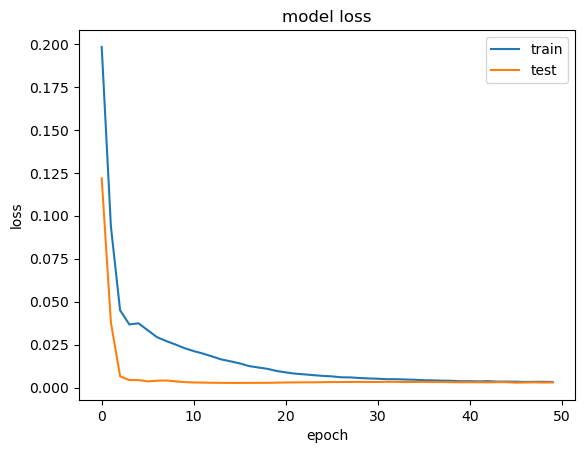

In [853]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()